In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn import preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Pet -project посвящен прогнозированию продаж для каждого семейства продуктов в различных магазинах. Данные получены от эквадорской компании, известной как Corporación Favorita, и это крупный продуктовый ритейлер. Кроме того, компания работает в других странах Южной Америки.**

**Данные представлены 54 магазинами и 33 семействами продуктов. Данные отражают временной промежуток с 2013-01-01 по 2017-08-31.**

In [ ]:
train = pd.read_csv('drive/My Drive/Colab Notebooks/Kaggle/train.csv')
oil = pd.read_csv('drive/My Drive/Colab Notebooks/Kaggle/oil.csv')
transactions = pd.read_csv('drive/My Drive/Colab Notebooks/Kaggle/transactions.csv')
holidays_events = pd.read_csv('drive/My Drive/Colab Notebooks/Kaggle/holidays_events.csv')
stores = pd.read_csv('drive/My Drive/Colab Notebooks/Kaggle/stores.csv')
sample_submission = pd.read_csv('drive/My Drive/Colab Notebooks/Kaggle/stores.csv')


# **Просмотр и Merge данных перед анализом**

In [ ]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
holidays_events.head()


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
sample_submission.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
train_with_oil= train.merge(oil, on="date", how="left")
train_with_oil

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57


In [ ]:
train_with_trans= train_with_oil.merge(transactions, on = ['store_nbr', 'date'], how="left")
train_with_trans

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,NaN
...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,2155.0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,2155.0
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,2155.0
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,2155.0


In [ ]:
train_with_store = train_with_trans.merge(stores, on="store_nbr", how='left')
train_with_store

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,NaN,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,2155.0,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,2155.0,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,2155.0,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,2155.0,Quito,Pichincha,B,6


In [ ]:
holidays_events.drop_duplicates()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [ ]:
holidays_events['date'].unique

<bound method Series.unique of 0      2012-03-02
1      2012-04-01
2      2012-04-12
3      2012-04-14
4      2012-04-21
          ...    
345    2017-12-22
346    2017-12-23
347    2017-12-24
348    2017-12-25
349    2017-12-26
Name: date, Length: 350, dtype: object>

In [ ]:
train_with_store.drop_duplicates()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,NaN,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,2155.0,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,2155.0,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,2155.0,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,2155.0,Quito,Pichincha,B,6


##При присоединении таблицы с праздниками количество строк резко увеличивается. Дубликаты я все удалилиа. Возможно на одну дату приходится несколько праздников (национальный + региональный)

In [ ]:
train_with_all = train_with_store.merge(holidays_events, on="date", how='left')
train_with_all

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,2155.0,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,2155.0,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,2155.0,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,2155.0,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False


## **Предобработка данных (добавление новых колонок, переименование столбцов)**

In [ ]:
train_with_all.rename(columns={'type_x':'type_of_store', 'type_y':'Type_of_day'}, inplace= True)

In [ ]:
train_with_all.dtypes

id                 int64
date              object
store_nbr          int64
family            object
sales            float64
onpromotion        int64
dcoilwtico       float64
transactions     float64
city              object
state             object
type_of_store     object
cluster            int64
Type_of_day       object
locale            object
locale_name       object
description       object
transferred       object
dtype: object

In [ ]:
train_with_all['date']=pd.to_datetime(train_with_all['date'])

In [ ]:
train_with_all['Year'] = train_with_all['date'].dt.year
train_with_all['Month'] = train_with_all['date'].dt.month_name()
train_with_all['quarter'] = train_with_all['date'].dt.quarter
train_with_all['day_of_week'] = train_with_all['date'].dt.day_name()


###**EDA (анализ данных)**

In [ ]:
train_with_all.dtypes

id                        int64
date             datetime64[ns]
store_nbr                 int64
family                   object
sales                   float64
onpromotion               int64
dcoilwtico              float64
transactions            float64
city                     object
state                    object
type_of_store            object
cluster                   int64
Type_of_day              object
locale                   object
locale_name              object
description              object
transferred              object
Year                      int64
Month                    object
quarter                   int64
day_of_week              object
dtype: object

In [ ]:
train_with_all.shape

(3054348, 21)

In [ ]:
train_with_all.isna().any()

id               False
date             False
store_nbr        False
family           False
sales            False
onpromotion      False
dcoilwtico        True
transactions      True
city             False
state            False
type_of_store    False
cluster          False
Type_of_day       True
locale            True
locale_name       True
description       True
transferred       True
Year             False
Month            False
quarter          False
day_of_week      False
dtype: bool

In [ ]:
train_with_all.isna().sum()


id                     0
date                   0
store_nbr              0
family                 0
sales                  0
onpromotion            0
dcoilwtico        955152
transactions      249117
city                   0
state                  0
type_of_store          0
cluster                0
Type_of_day      2551824
locale           2551824
locale_name      2551824
description      2551824
transferred      2551824
Year                   0
Month                  0
quarter                0
day_of_week            0
dtype: int64

In [ ]:
train_with_all.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'dcoilwtico', 'transactions', 'city', 'state', 'type_of_store',
       'cluster', 'Type_of_day', 'locale', 'locale_name', 'description',
       'transferred', 'Year', 'Month', 'quarter', 'day_of_week'],
      dtype='object')

**В столбцах 'Type_of_day', 'locale', 'locale_name', 'description', 'transferred' большой процент отсутствующих данных. Их можно не учитывать в дальшейшем анализе**

In [ ]:
Null_Values=np.sum(train_with_all.isnull())
Null_Values/len(train_with_all)*100

id                0.000000
date              0.000000
store_nbr         0.000000
family            0.000000
sales             0.000000
onpromotion       0.000000
dcoilwtico       31.271879
transactions      8.156143
city              0.000000
state             0.000000
type_of_store     0.000000
cluster           0.000000
Type_of_day      83.547258
locale           83.547258
locale_name      83.547258
description      83.547258
transferred      83.547258
Year              0.000000
Month             0.000000
quarter           0.000000
day_of_week       0.000000
dtype: float64

In [ ]:
train_with_all.drop(columns = {'Type_of_day', 'locale', 'locale_name', 'description', 'transferred'}, inplace = True)

**При анализе продаж, мы видим пики в конце каждого года, что вполне ожидаемо, а также большой пик в 2016 году.**

**16 апреля 2016 года в Эквадоре произошло землетрясение магнитудой 7,8. Люди объединились для оказания помощи, жертвуя воду и другие товары первой необходимости, что сильно повлияло на продажи в супермаркетах в течение нескольких недель после землетрясения.**

<Axes: title={'center': 'sales_by_date'}, xlabel='date'>

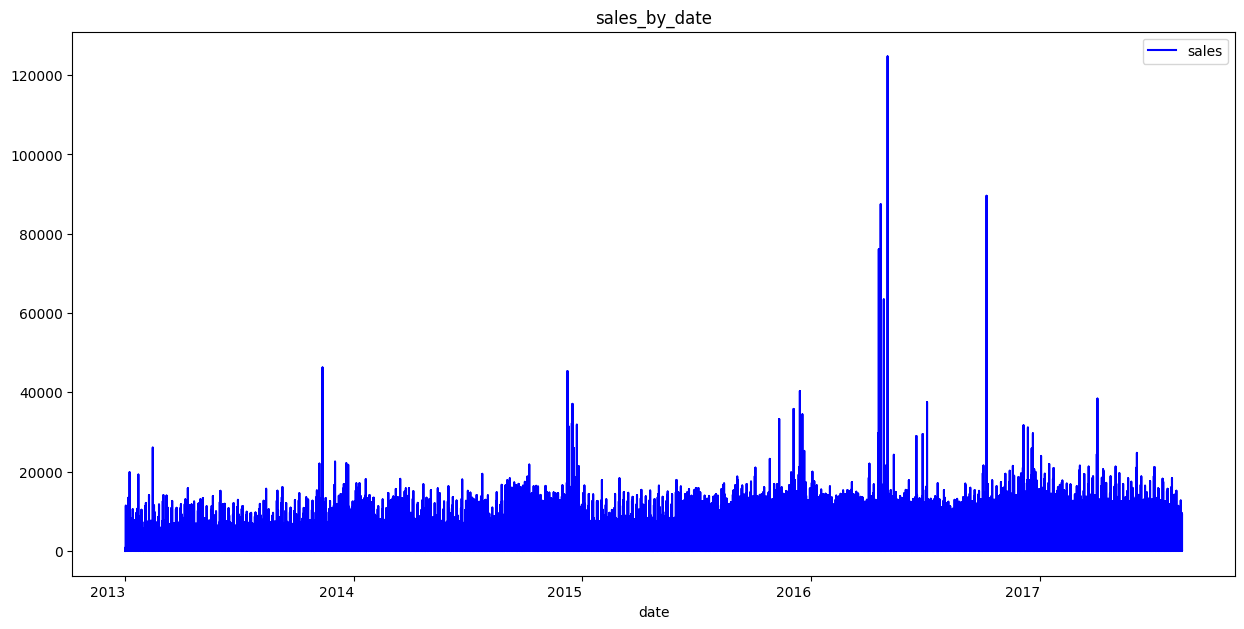

In [ ]:
train_with_all.plot.line(x="date", y="sales", color='blue', title ="sales_by_date", rot=0, figsize=(15,8))

In [ ]:
train_with_all

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type_of_store,cluster,Year,Month,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday


##Если рассмотреть продажи к примеру 2015 года, то можно заметить не только пик продаж в конце года, но и помесячную цикличность, что очевидно связано с выплатами зп в конце месяца

<Axes: title={'center': 'sales_by_date'}, xlabel='date'>

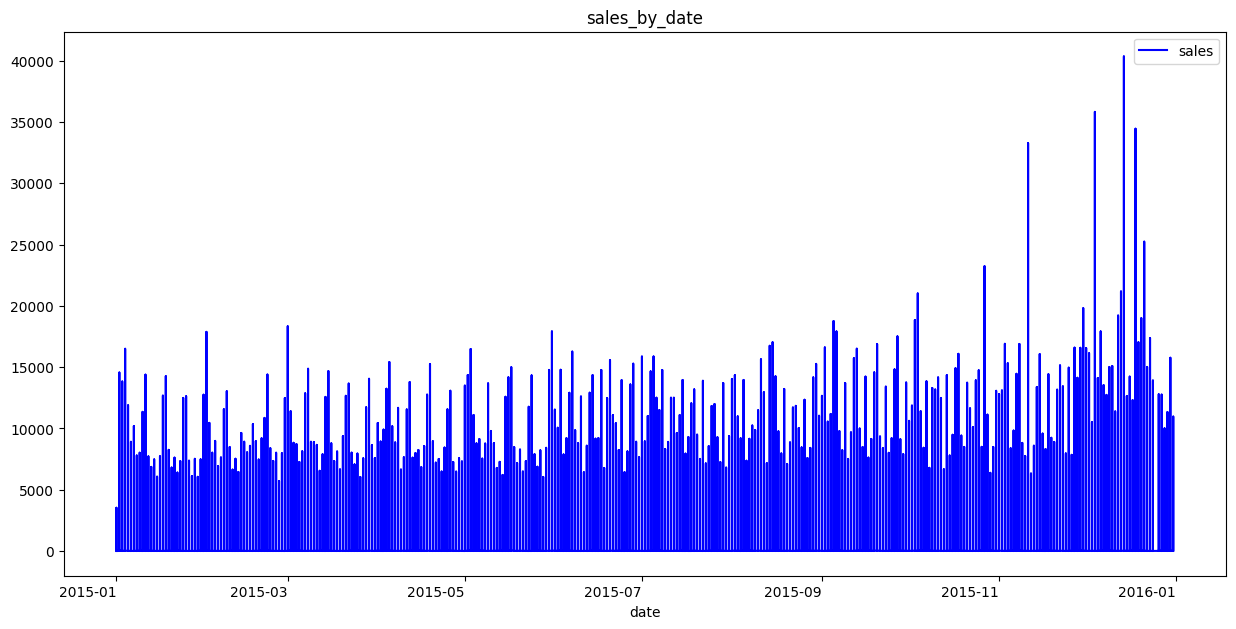

In [ ]:
train_with_all[(train_with_all['Year']==2015)].plot.line(x="date", y="sales", color='blue', title ="sales_by_date", rot=0, figsize=(15,8))

## Если же взять отдельный месяц, что можно четко увидеть пики продаж, приходящиеся на пятницу, субботу и воскресенье.

In [ ]:
train_with_all

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type_of_store,cluster,Year,Month,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday


In [ ]:
from datetime import datetime

# Функция для преобразования месяца в число
def convert_month_to_number(month):
    date = datetime.strptime(month, "%B")
    return date.month

# Применение функции к столбцу "Month" в таблице "rain_with_all"
train_with_all["Month__In_Num"] = train_with_all["Month"].apply(convert_month_to_number)

<Axes: title={'center': 'sales_by_date'}, xlabel='date'>

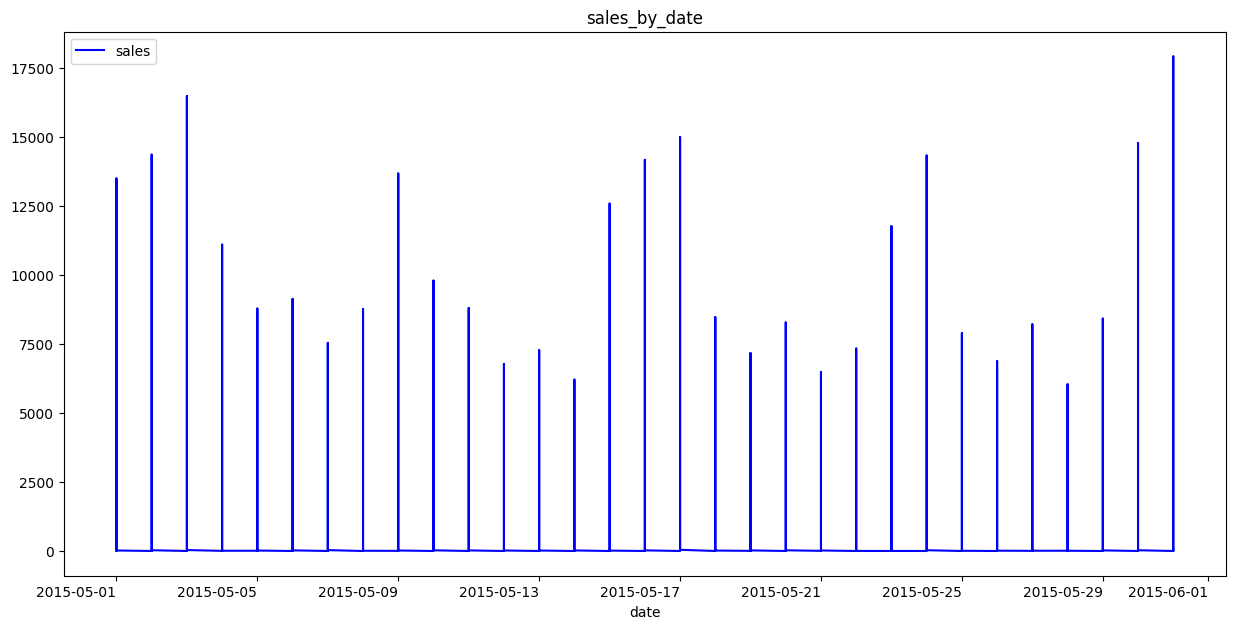

In [ ]:
train_with_all[(train_with_all['Year']==2015) & (train_with_all['Month__In_Num']==5)].plot.line(x="date", y="sales", color='blue', title ="sales_by_date", rot=0, figsize=(15,8))

**На графике рассмотрим цены на нефть, так как экономика Южной Америки сильно от них зависит. С 2013 года наблюдается нисходящий тренд с минимумом в 2016 году.**
**Также мы види "пропуски" в данных, которые еще предстоит обработать.**

<Axes: title={'center': 'dcoilwtico'}, xlabel='date'>

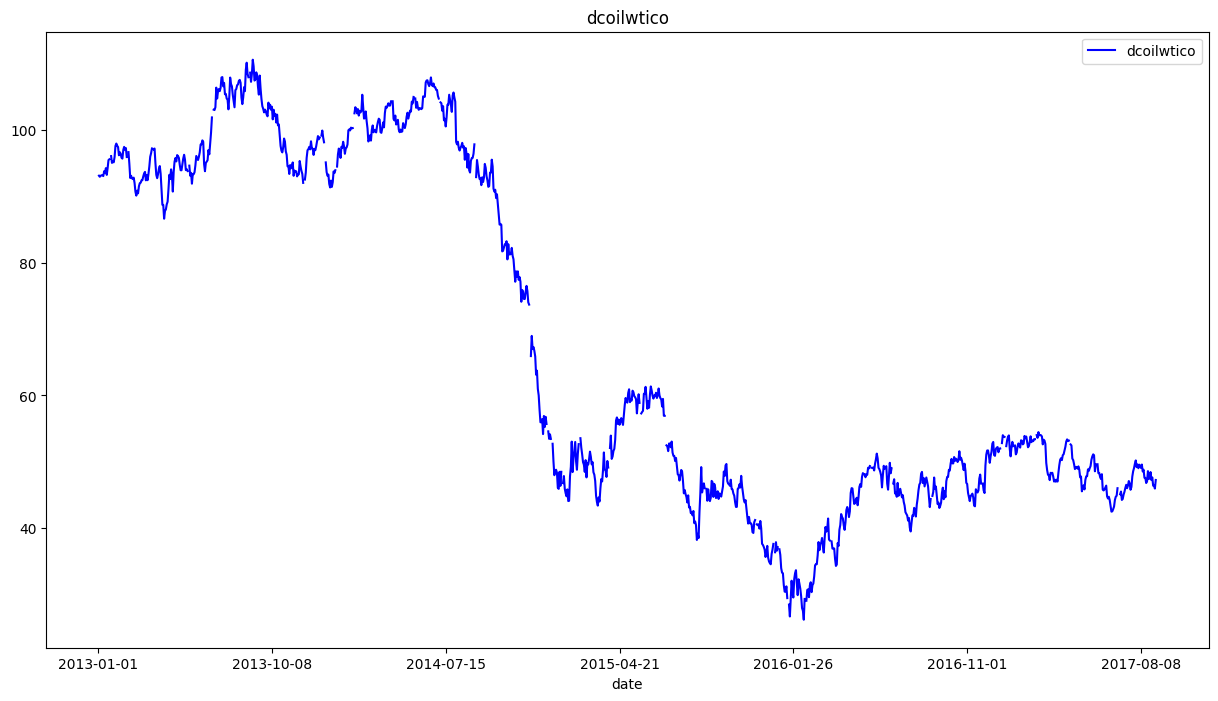

In [ ]:
oil.plot.line(x="date", y="dcoilwtico", color='blue', title ="dcoilwtico", rot=0, figsize=(15,8))

**При помесячном анализе продаж, видно, что в ноябре и декабре продажи в среднем больше, чем в другие месяцы. То же самое видно и на поквартальном анализе. На второе полугодие приходится больше продаж**

In [ ]:
month_with_sales = train_with_all.groupby(['Month', 'Month__In_Num']).agg({"sales" : "mean"}).sort_values(by='Month__In_Num', ascending=True)
month_with_sales

,,sales
Month,Month__In_Num,
January,1,341.921554
February,2,320.928869
March,3,352.009294
April,4,341.167844
May,5,345.652814
June,6,352.511265
July,7,376.414091
August,8,336.992535
September,9,362.297418


In [ ]:
mean_sales_by_quarter = train_with_all.groupby(['quarter'])[['sales']].mean()
mean_sales_by_quarter

,sales
quarter,
1,338.825392
2,346.546038
3,359.334098
4,399.229622


In [ ]:
# Задаем словарь с номерами дней недели
days = {
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7
}

# Применяем метод map для замены значений
train_with_all["day_of_week_in_num"] = train_with_all["day_of_week"].map(days)

**В анализе по дням недели видно, что в выходные дни продажи существенно выше чем в другие дни, так как люди покупают продукты на неделю**

In [ ]:
mean_sales_by_day_of_week = train_with_all.groupby(['day_of_week', 'day_of_week_in_num'])[['sales']].mean().sort_values(by='day_of_week_in_num', ascending=True)
mean_sales_by_day_of_week

,,sales
day_of_week,day_of_week_in_num,
Monday,1,348.157110
Tuesday,2,319.920782
Wednesday,3,330.765009
Thursday,4,286.574367
Friday,5,326.732362
Saturday,6,434.785811
Sunday,7,464.744338


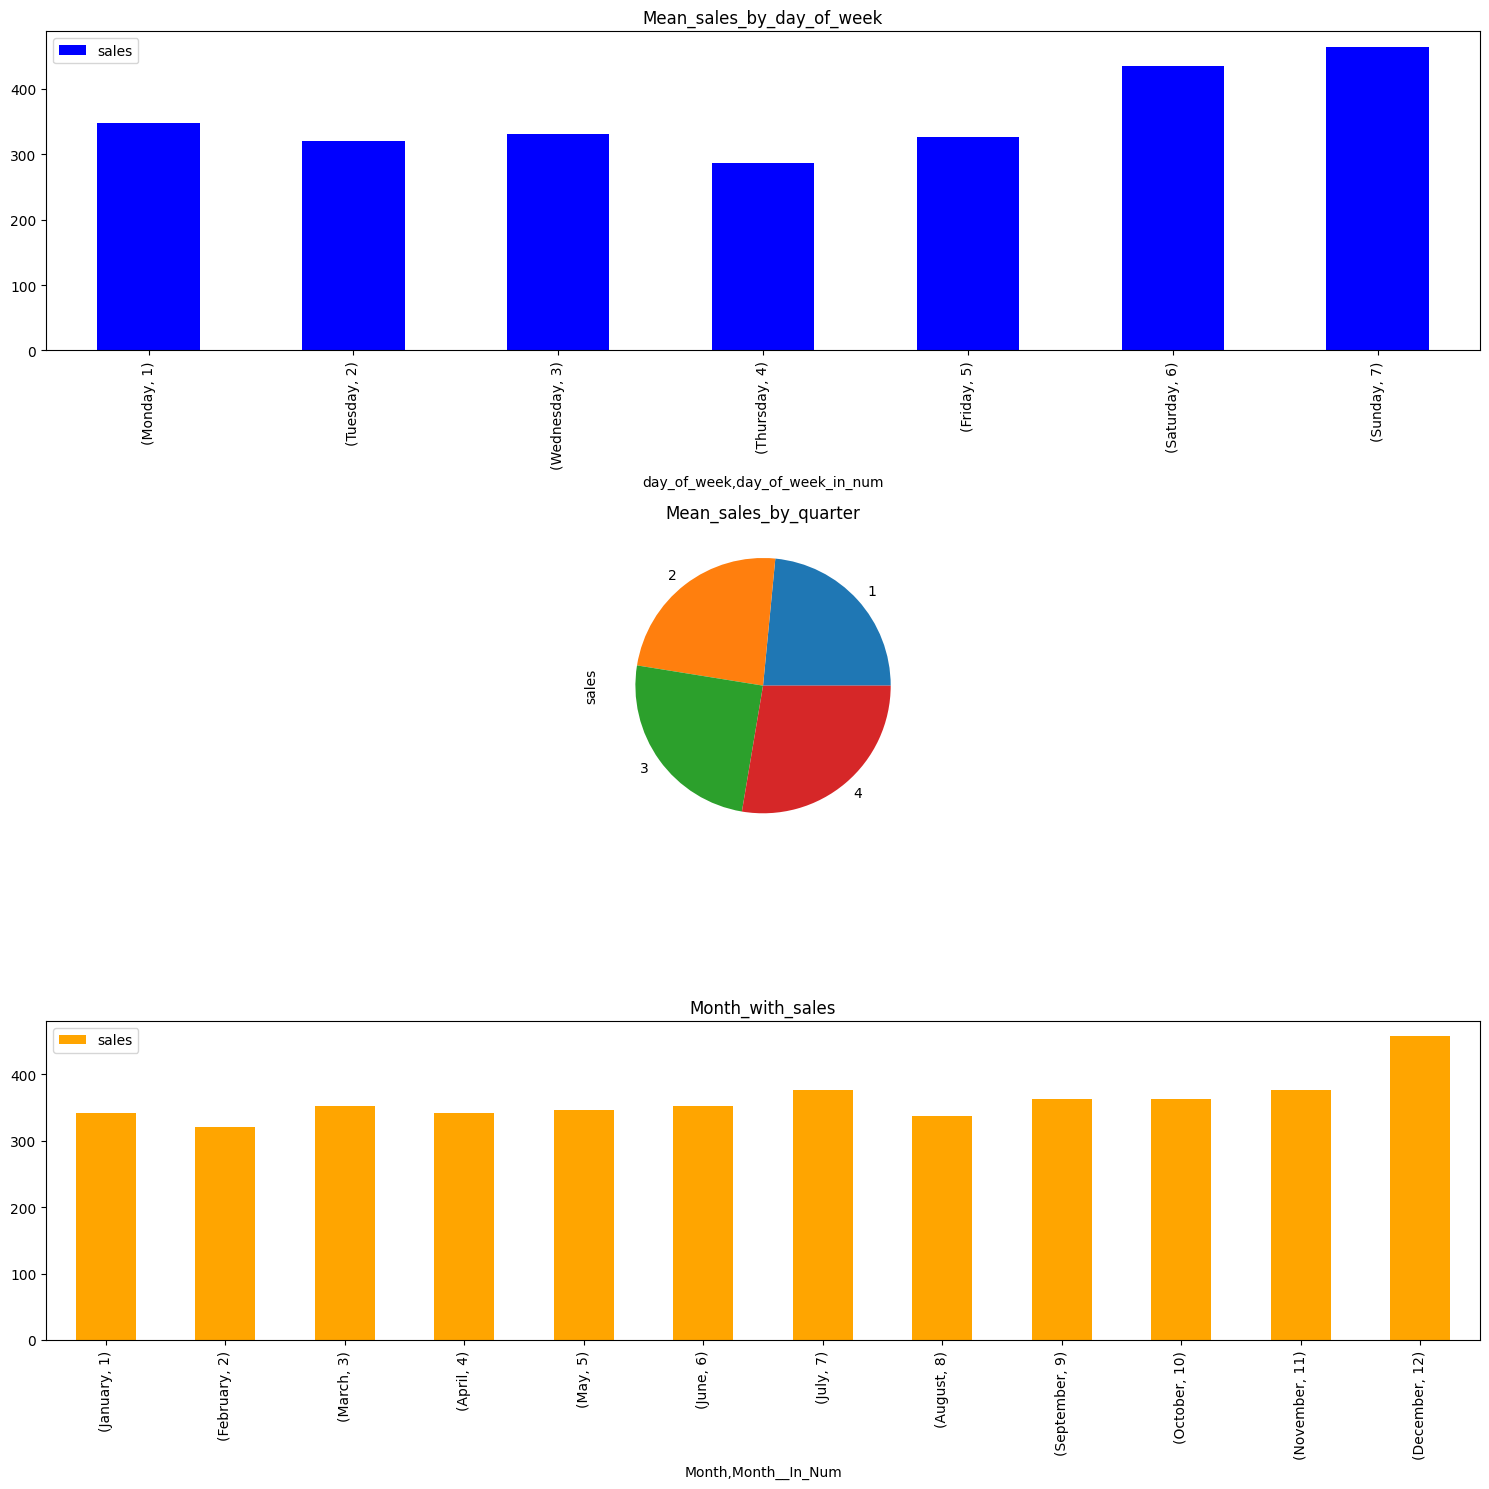

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

axes[0].set_title('Mean_sales_by_day_of_week')
mean_sales_by_day_of_week.plot.bar(color='blue', ax=axes[0])

axes[1].set_title('Mean_sales_by_quarter')
mean_sales_by_quarter['sales'].plot.pie(ax=axes[1])

axes[2].set_title('Month_with_sales')
month_with_sales.plot.bar(color="orange", ax=axes[2])


plt.tight_layout()
plt.show()

In [ ]:
store_type_year_month= train_with_all.groupby(['Year', 'Month', 'type_of_store']).agg({'sales':'mean'}).reset_index()
store_type_year_month

,Year,Month,type_of_store,sales
0,2013,April,A,411.878127
1,2013,April,B,193.394971
2,2013,April,C,125.988077
3,2013,April,D,202.363794
4,2013,April,E,79.519368
...,...,...,...,...
275,2017,May,A,976.496682
276,2017,May,B,459.541320
277,2017,May,C,264.025697
278,2017,May,D,456.935718


**Далее проанализируем продажи в зависимости от типа магазина. Тут м ыувидим, что в магазинах типа А продажи во все годы существенно больше чем в других. А в магазинах типа С меньше всего.**

In [ ]:
import plotly.express as px

In [ ]:
fig1 = px.scatter(store_type_year_month, x='Month', y='type_of_store', color='sales', size='sales',
                 facet_row='Year', title='Average Sales: Store Type Vs Year(Month)')

fig1.update_layout(
    width=1100,
    height=1100
)

In [ ]:
month_year_sales=train_with_all.groupby(['Year', 'Month', 'Month__In_Num']).agg({"sales" : "mean"}).sort_values(by=['Year', 'Month__In_Num'], ascending=True)
month_year_sales

sales
Year Month     Month__In_Num            
2013 January   1              186.952405
     February  2              193.581846
     March     3              206.880581
     April     4              205.639071
     May       5              210.184563
     June      6              215.691343
     July      7              203.983455
     August    8              212.479434
     September 9              220.593588
     October   10             213.164266
     November  11             231.136537
     December  12             298.675144
2014 January   1              342.341709
     February  2              241.268892
     March     3              368.661236
     April     4              240.577087
     May       5              242.203129
     June      6              244.634652
     July      7              350.830102
     August    8              251.351805
     September 9              374.530792
     October   10             369.213666
     November  11             384.056027
     December  12             459.818606
2015 January   1              269.666595
     February  2              275.420792
     March     3              282.368624
     April     4              279.743138
     May       5              320.958116
     June      6              397.249619
     July      7              403.030170
     August    8              415.692304
     September 9              434.734053
     October   10             432.248428
     November  11             426.579749
     December  12             513.845328
2016 January   1              434.050268
     February  2              424.695398
     March     3              418.735398
     April     4              488.108774
     May       5              457.671398
     June      6              419.644575
     July      7              432.562218
     August    8              406.437390
     September 9              419.331240
     October   10             435.002169
     November  11             462.916675
     December  12             557.114822
2017 January   1              476.596791
     February  2              465.971468
     March     3              483.400632
     April     4              482.172948
     May       5              487.162797
     June      6              488.707278
     July      7              489.909880
     August    8              465.144891

**На графиках продаж по месяцам видно, что продажи выросли почти в 2 раза с 2013 по 2016 год. Рост пропорционален по месяцам.**

**Не знаю какой из 2 графиков лучше оставить. Они по сути об одном и том же**

In [ ]:
fig2 = px.scatter(store_type_year_month, x='Month', y='Year', color='sales', size='sales',
                 facet_row='Year', title='Average Sales by Month')

fig2.update_layout(
    width=1000,
    height=1000
)

##*При детальном рассмотрении других показателей продаж можно сделать следующие выводы:*
- суммы продаж в июле и декабре выше чем в другие месяцы
- количество совершенных продаж +/- одинаково из года в год, если не считать 2017 год за который у нас неполные данные
- количество транзакций в первом полугодии выше чем во втором

In [ ]:
item_month = train_with_all.groupby(['Month', 'Month__In_Num'])[['sales']].sum().sort_values(by='Month__In_Num', ascending=True)
item_month

,,sales
Month,Month__In_Num,
January,1,9.444215e+07
February,2,8.063723e+07
March,3,9.722849e+07
April,4,9.241009e+07
May,5,9.855253e+07
June,6,1.011362e+08
July,7,1.079940e+08
August,8,8.347238e+07
September,9,7.747368e+07


In [ ]:
item_year = train_with_all.groupby(['Year'])[['sales']].count().sort_values(by='Year')
item_year

,sales
Year,
2013,657558
2014,659340
2015,655776
2016,670032
2017,411642


In [ ]:
transactions_month = train_with_all.groupby(['Month', 'Month__In_Num'])[['transactions']].count().sort_values(by= 'Month__In_Num')
transactions_month

,,transactions
Month,Month__In_Num,
January,1,241065
February,2,230505
March,3,253935
April,4,248820
May,5,263208
June,6,266475
July,7,266541
August,8,228855
September,9,195624


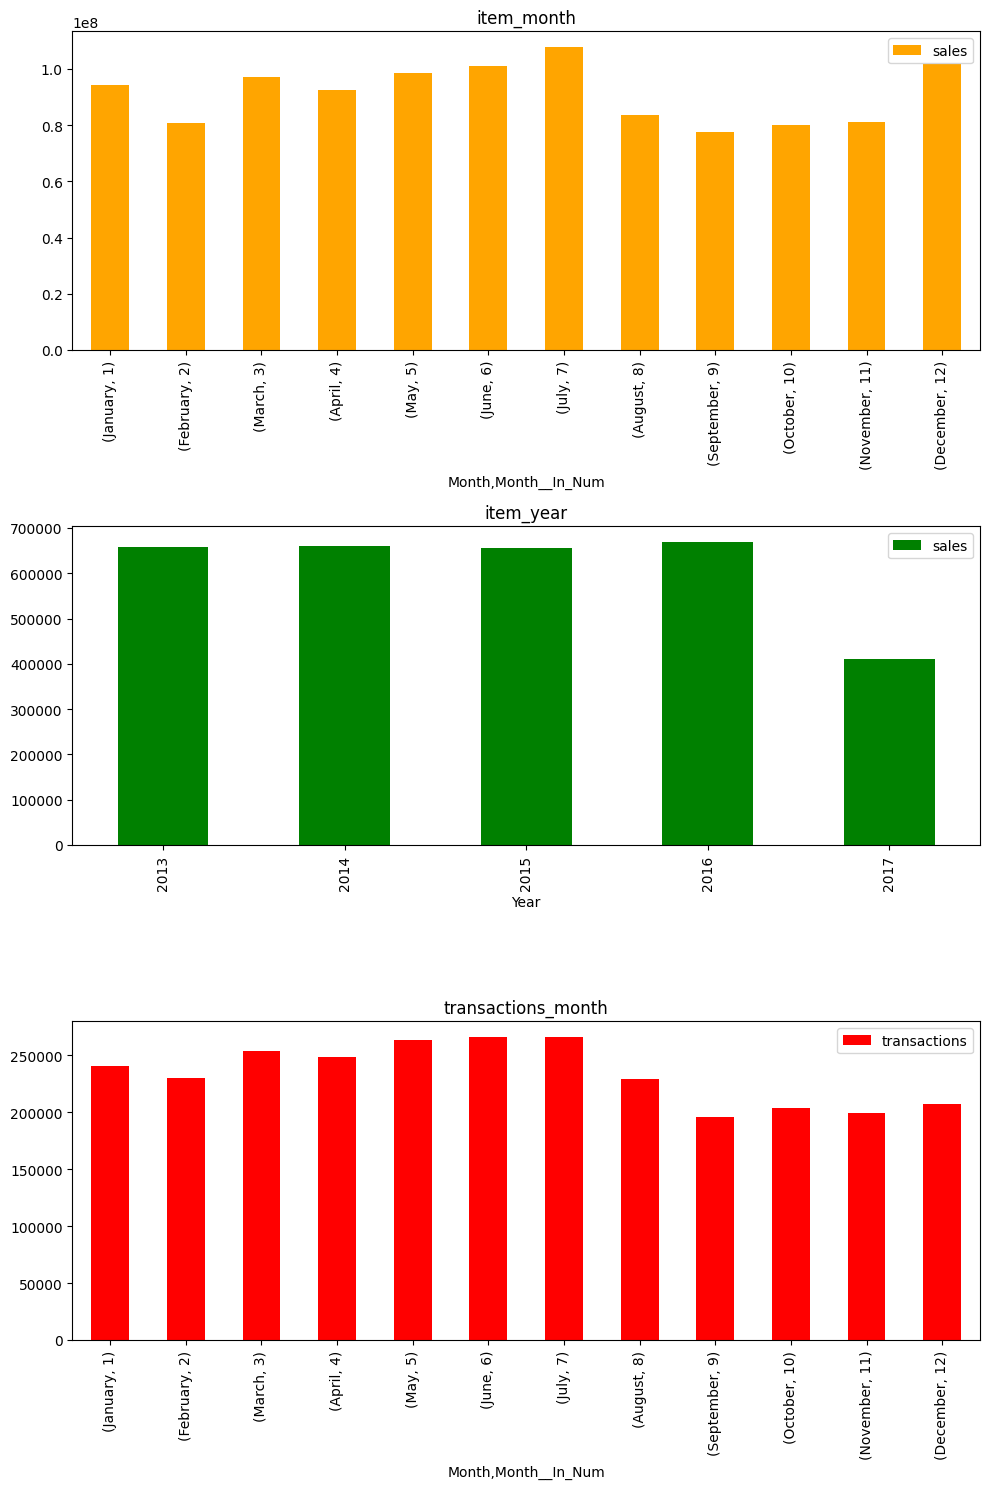

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))


axes[0].set_title('item_month')
item_month.plot.bar(color="orange", ax=axes[0])

axes[1].set_title('item_year')
item_year.plot.bar(color="green", ax=axes[1])

axes[2].set_title('transactions_month')
transactions_month.plot.bar(color="red", ax=axes[2])

plt.tight_layout()
plt.show()

**При детальном рассмотрении данных можно заметить, что есть данные, где sales=0, transactions>1. Что говорит о ом, что транзакция не принесла прибыли компании, но была совершена. Речь может идти о возврате товаров**

In [ ]:
goods_not_sold = train_with_all[(train_with_all['sales']==0) & (train_with_all['transactions']>1)]
goods_not_sold

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type_of_store,cluster,Year,Month,quarter,day_of_week,Month__In_Num,day_of_week_in_num
561,561,2013-01-01,25,AUTOMOTIVE,0.0,0,NaN,770.0,Salinas,Santa Elena,D,1,2013,January,1,Tuesday,1,2
562,562,2013-01-01,25,BABY CARE,0.0,0,NaN,770.0,Salinas,Santa Elena,D,1,2013,January,1,Tuesday,1,2
565,565,2013-01-01,25,BOOKS,0.0,0,NaN,770.0,Salinas,Santa Elena,D,1,2013,January,1,Tuesday,1,2
567,567,2013-01-01,25,CELEBRATION,0.0,0,NaN,770.0,Salinas,Santa Elena,D,1,2013,January,1,Tuesday,1,2
575,575,2013-01-01,25,HARDWARE,0.0,0,NaN,770.0,Salinas,Santa Elena,D,1,2013,January,1,Tuesday,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054299,3000839,2017-08-15,8,HOME APPLIANCES,0.0,0,47.57,2621.0,Quito,Pichincha,D,8,2017,August,3,Tuesday,8,2
3054313,3000853,2017-08-15,8,SCHOOL AND OFFICE SUPPLIES,0.0,0,47.57,2621.0,Quito,Pichincha,D,8,2017,August,3,Tuesday,8,2
3054316,3000856,2017-08-15,9,BABY CARE,0.0,0,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday,8,2
3054319,3000859,2017-08-15,9,BOOKS,0.0,0,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday,8,2


***Далее проведем анализ этой категории покупок (по количеству по месяцам, годам, такегориям товаров) и визуализируем полученный результат***

In [ ]:
goods_not_sold.groupby(['Year', 'Month', 'Month__In_Num'])[['sales']].count().sort_values(by=['Year', 'Month__In_Num'])

sales
Year Month     Month__In_Num       
2013 January   1              20091
     February  2              18696
     March     3              19905
     April     4              18938
     May       5              20618
     June      6              20732
     July      7              20703
     August    8              20409
     September 9              19811
     October   10             20470
     November  11             19566
     December  12             20054
2014 January   1               8611
     February  2              18156
     March     3               8534
     April     4              19431
     May       5              20157
     June      6              21950
     July      7               9060
     August    8              20186
     September 9               8011
     October   10              9104
     November  11              8902
     December  12              8743
2015 January   1              17146
     February  2              15830
     March     3              17865
     April     4              16450
     May       5              15781
     June      6               9751
     July      7              10012
     August    8               9173
     September 9               9164
     October   10              9035
     November  11              8880
     December  12              8736
2016 January   1               8173
     February  2               8203
     March     3               9080
     April     4               8720
     May       5               9427
     June      6               9225
     July      7               9708
     August    8               8334
     September 9               7934
     October   10              7954
     November  11              7985
     December  12              7819
2017 January   1               7424
     February  2               7085
     March     3               7422
     April     4               7311
     May       5               7209
     June      6               8059
     July      7               8236
     August    8               3903

In [ ]:
Year= goods_not_sold.groupby(['Year']).agg({"sales" : "count"}).sort_values(by='Year')
Year

,sales
Year,
2013,239993
2014,160845
2015,147823
2016,102562
2017,56649


In [ ]:
quarter= goods_not_sold.groupby(['quarter'])[['sales']].count().sort_values(by='quarter')
quarter

,sales
quarter,
1,192221
2,213759
3,164644
4,137248


In [ ]:
Month = goods_not_sold.groupby(['Month', 'Month__In_Num'])[['sales']].count().sort_values(by='Month__In_Num')
Month

,,sales
Month,Month__In_Num,
January,1,61445
February,2,67970
March,3,62806
April,4,70850
May,5,73192
June,6,69717
July,7,57719
August,8,62005
September,9,44920


In [ ]:
family = goods_not_sold.groupby(['family'])[['sales']].count().sort_values(by='sales', ascending=False).head(10)
family

,sales
family,
BOOKS,82192
BABY CARE,79540
SCHOOL AND OFFICE SUPPLIES,60955
HOME APPLIANCES,60572
LADIESWEAR,47770
MAGAZINES,44699
PET SUPPLIES,42923
HARDWARE,36808
LAWN AND GARDEN,35789


##В результате проведенного анализа мы видим следующий результат:
- несмотря на рост продаж, количество возвратов из года в год сокращается
- больше всего возвратов происходит во 2 квартале, а именно в мае
- наиболее возвращаемыми товарами являются книги и детские вещи

In [ ]:
def plot_for_not_sold(df, column, ax, color, angle):
    count_classes = df[column].value_counts()
    ax = sns.barplot(x=count_classes.index, y=count_classes, ax=ax, palette=color)
    ax.set_title(column.upper(), fontsize=10)
    for tick in ax.get_xticklabels():
        tick.set_rotation(angle)

<ipython-input-69-276638ba583c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-69-276638ba583c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-69-276638ba583c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-69-276638ba583c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




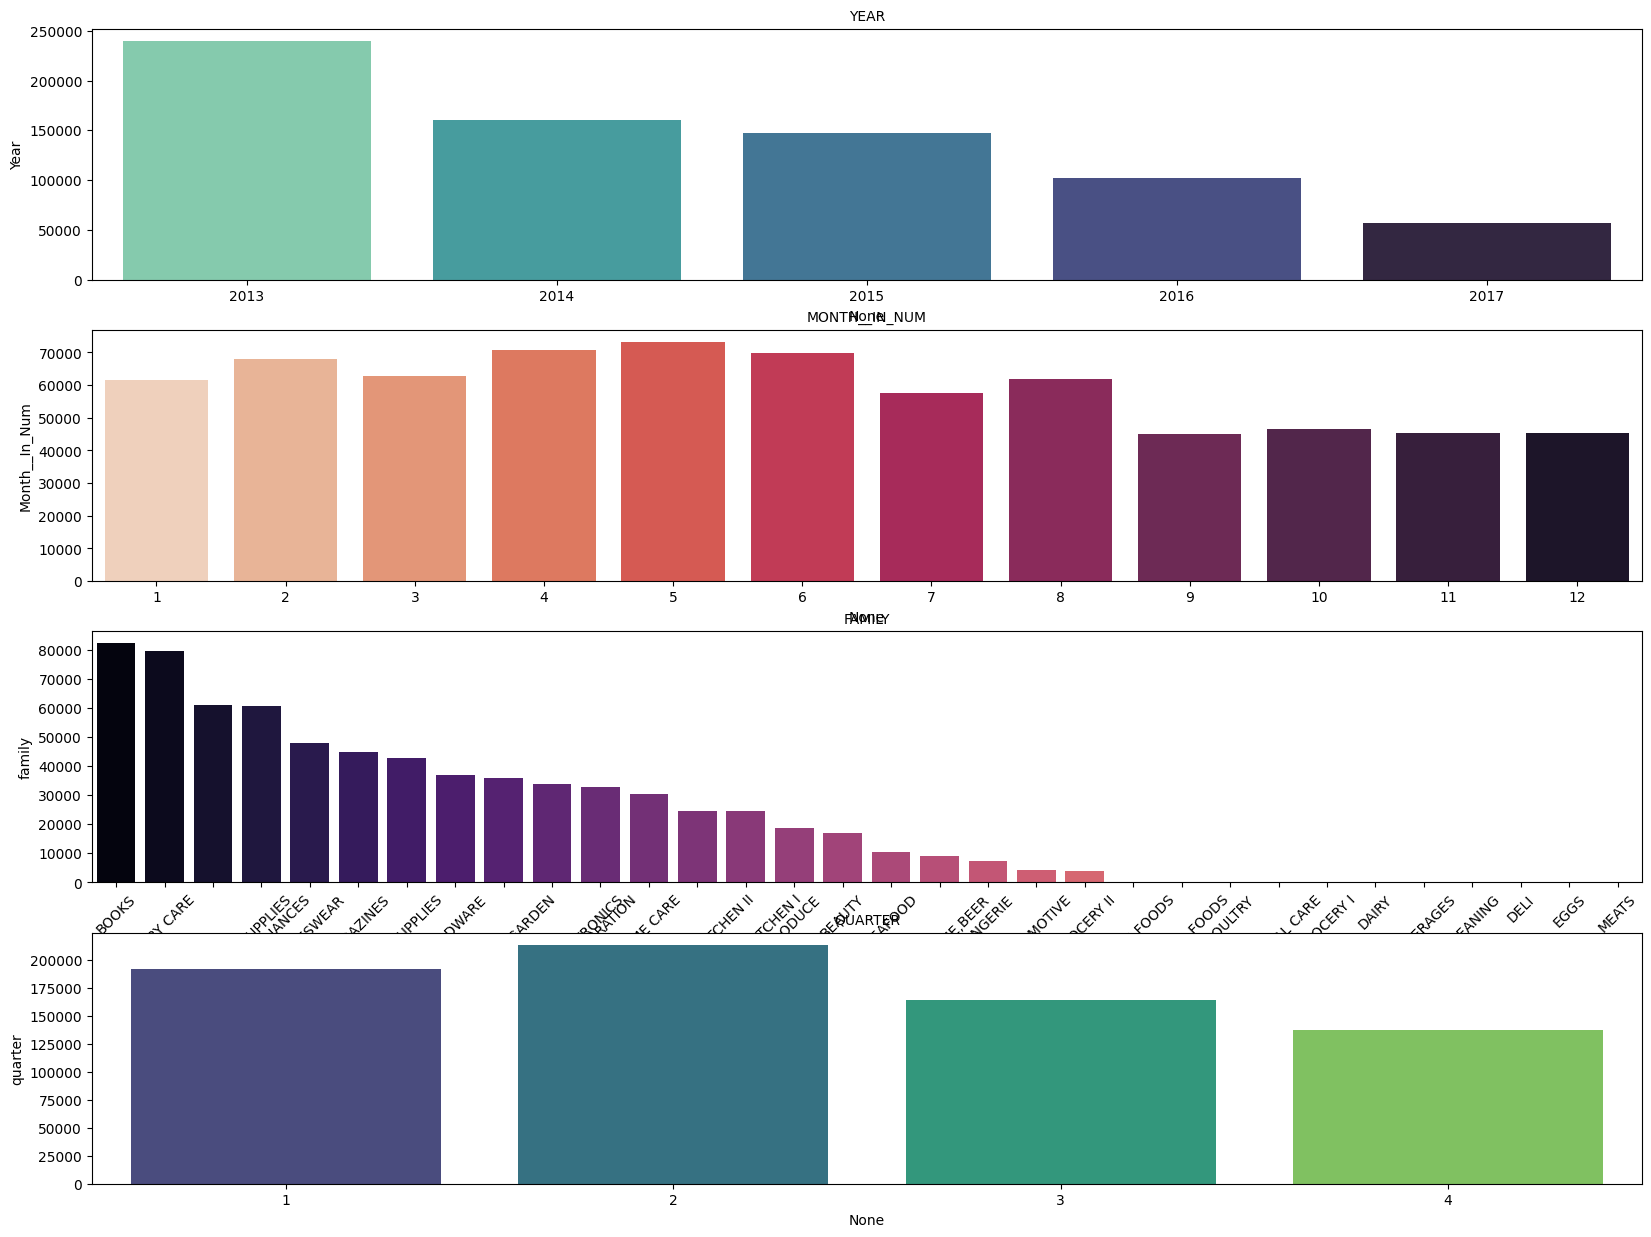

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 15))
plot_for_not_sold(goods_not_sold, "Year", axes[0], "mako_r", 0)
plot_for_not_sold(goods_not_sold, "Month__In_Num", axes[1], "rocket_r", 0)
plot_for_not_sold(goods_not_sold, "family", axes[2], "magma", 45)
plot_for_not_sold(goods_not_sold, "quarter", axes[3], "viridis", 0)
plt.show()

In [ ]:
goods_not_sold['amount'] = goods_not_sold.groupby(['Year','family'])[['sales']].transform('count')
item_s= goods_not_sold.loc[:, ['Year', 'family', 'amount']].sort_values(by=['Year','amount'], ascending=False).drop_duplicates()
item_s

<ipython-input-71-f48b04f143ba>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,family,amount
2643271,2017,BOOKS,10913
2644489,2017,BABY CARE,10618
2643284,2017,HOME APPLIANCES,8116
2643298,2017,SCHOOL AND OFFICE SUPPLIES,6067
2643281,2017,HARDWARE,4761
...,...,...,...
15092,2013,FROZEN FOODS,23
2008,2013,POULTRY,8
242975,2013,PREPARED FOODS,3
617570,2013,DAIRY,1


In [ ]:
new_item_from_not_sold = item_s['amount']/sum(goods_not_sold['amount'])

In [ ]:
res = item_s.merge(new_item_from_not_sold,  left_index=True, right_index=True)
res

,Year,family,amount_x,amount_y
2643271,2017,BOOKS,10913,1.263567e-06
2644489,2017,BABY CARE,10618,1.229410e-06
2643284,2017,HOME APPLIANCES,8116,9.397151e-07
2643298,2017,SCHOOL AND OFFICE SUPPLIES,6067,7.024706e-07
2643281,2017,HARDWARE,4761,5.512547e-07
...,...,...,...,...
15092,2013,FROZEN FOODS,23,2.663066e-09
2008,2013,POULTRY,8,9.262840e-10
242975,2013,PREPARED FOODS,3,3.473565e-10
617570,2013,DAIRY,1,1.157855e-10


При рассмотрении долей возвратов каждого товара к общей сумме возвратов видно, что доля возвратов каждогоиз них минимальна, особенно с учетом того, что количество возвратов учитывает все годы.

In [ ]:
res.rename(columns={'amount_x': 'amount_in_absolut', 'amount_y': 'amount_from_not_sold'}, inplace = True)
res

,Year,family,amount_in_absolut,amount_from_not_sold
2643271,2017,BOOKS,10913,1.263567e-06
2644489,2017,BABY CARE,10618,1.229410e-06
2643284,2017,HOME APPLIANCES,8116,9.397151e-07
2643298,2017,SCHOOL AND OFFICE SUPPLIES,6067,7.024706e-07
2643281,2017,HARDWARE,4761,5.512547e-07
...,...,...,...,...
15092,2013,FROZEN FOODS,23,2.663066e-09
2008,2013,POULTRY,8,9.262840e-10
242975,2013,PREPARED FOODS,3,3.473565e-10
617570,2013,DAIRY,1,1.157855e-10


#*При рассмторени возвратов различных групп товаров по года, можно отметить следующее*:
- с 2013 года росло количество возвратов по следующим категориям: школьные и офисные принадлежности, вещи для дома и кухни, товары для домашних питомцев, женская одежда и журналы.

In [ ]:
fig = px.scatter(item_s, x='family', y='amount', color='amount', size='amount',
                 facet_row='Year', title='Items which is sold')
fig.update_layout(
    width=2100,
    height=1100
)

#**Теперь проанализируем все товары по суммам продаж:**
-  Самыми продаваемыми товрами являются бакалея и напитки.
-  Наименее продаваемыми являются как раз товары которые чаще возвращают.

In [ ]:
items_by_family = train_with_all.groupby(['family'])[['sales']].sum().sort_values(by='sales', ascending=False).head(10)
items_by_family

,sales
family,
GROCERY I,3.508273e+08
BEVERAGES,2.216635e+08
PRODUCE,1.254480e+08
CLEANING,9.942102e+07
DAIRY,6.582360e+07
BREAD/BAKERY,4.295992e+07
POULTRY,3.249445e+07
MEATS,3.165100e+07
PERSONAL CARE,2.510048e+07


In [ ]:
item_year_family = train_with_all.groupby(['Year','family'])[['sales']].sum().sort_values(by=['Year','sales'], ascending=False).reset_index()
item_year_family

,Year,family,sales
0,2017,GROCERY I,5.828372e+07
1,2017,BEVERAGES,4.485882e+07
2,2017,PRODUCE,2.981626e+07
3,2017,CLEANING,1.579128e+07
4,2017,DAIRY,1.169240e+07
...,...,...,...
160,2013,LADIESWEAR,0.000000e+00
161,2013,MAGAZINES,0.000000e+00
162,2013,PET SUPPLIES,0.000000e+00
163,2013,PLAYERS AND ELECTRONICS,0.000000e+00


#Далее представлен анализ праздничных дней

**Часть празднечных дней переносится. Перенесенный день больше похож на обычный день, чем на праздничный.**

In [ ]:
holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [ ]:
h_type_to_plot = holidays_events.groupby(['type'])[['date']].count().sort_values(by='date', ascending=False)
h_type_to_plot

,date
type,
Holiday,221
Event,56
Additional,51
Transfer,12
Bridge,5
Work Day,5


<Axes: xlabel='type'>

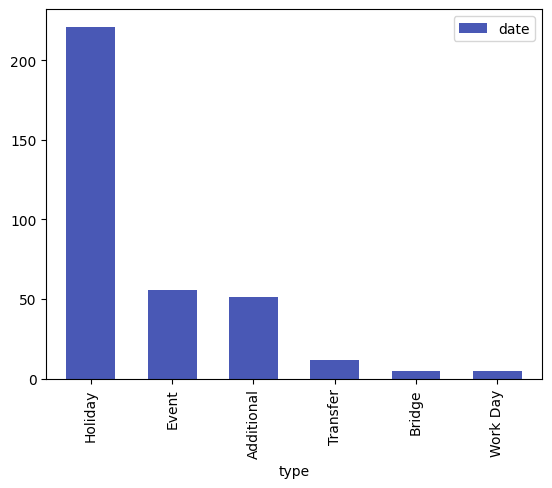

In [ ]:
h_type_to_plot.plot.bar(color ='#4958B5', width = 0.6)

In [ ]:
h_type_to_plot1 = holidays_events.groupby(['locale'])[['date']].count().sort_values(by='date', ascending=False)
h_type_to_plot1

,date
locale,
National,174
Local,152
Regional,24


<Axes: xlabel='locale'>

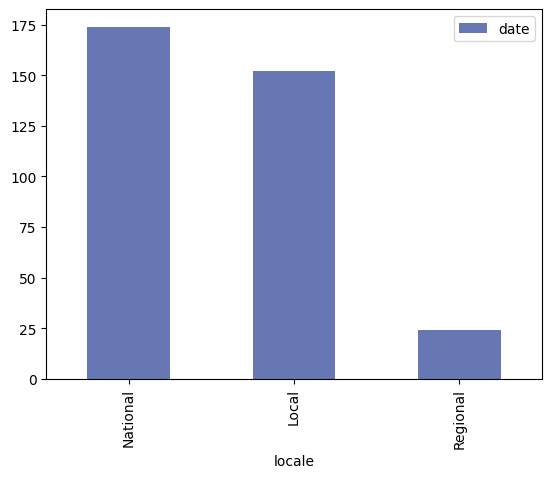

In [ ]:
h_type_to_plot1.plot.bar(color ='#6677B4', width = 0.5)

In [ ]:
cities = train_with_all.groupby('city')[['id']].count().sort_values(by='id')
state = train_with_all.groupby('state')[['id']].count().sort_values(by='id')
type_of_store = train_with_all.groupby('type_of_store')[['id']].count().sort_values(by='id')
cluster = train_with_all.groupby('cluster')[['id']].count().sort_values(by='cluster')

**При анализе географии продаж мы видим, что столица Эквадора Кито и провинция, в которой она находится Пичинча, лидируют по продажам с существенным отрывом.
А по количеству магазинов лидирует тип D, хотя ранее мы видели, что по средней сумме покупок совершенных в том или ином типе магазинов на первом месте были магазины типа А.**



##про кластера не нашла подробной информации и как интерпретировать не знаю

##Странная шкала по х до 1.Хотя я считала количество и там явно должны быть 1000

In [ ]:
def plot_stats(df, column, ax, color, angle):
    count_classes = df[column].value_counts()
    ax = sns.barplot(x=count_classes.index, y=count_classes, ax=ax, palette=color)
    ax.set_title(column.upper(), fontsize=10)
    for tick in ax.get_xticklabels():
        tick.set_rotation(angle)

<ipython-input-84-ce4767727483>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-84-ce4767727483>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-84-ce4767727483>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-84-ce4767727483>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




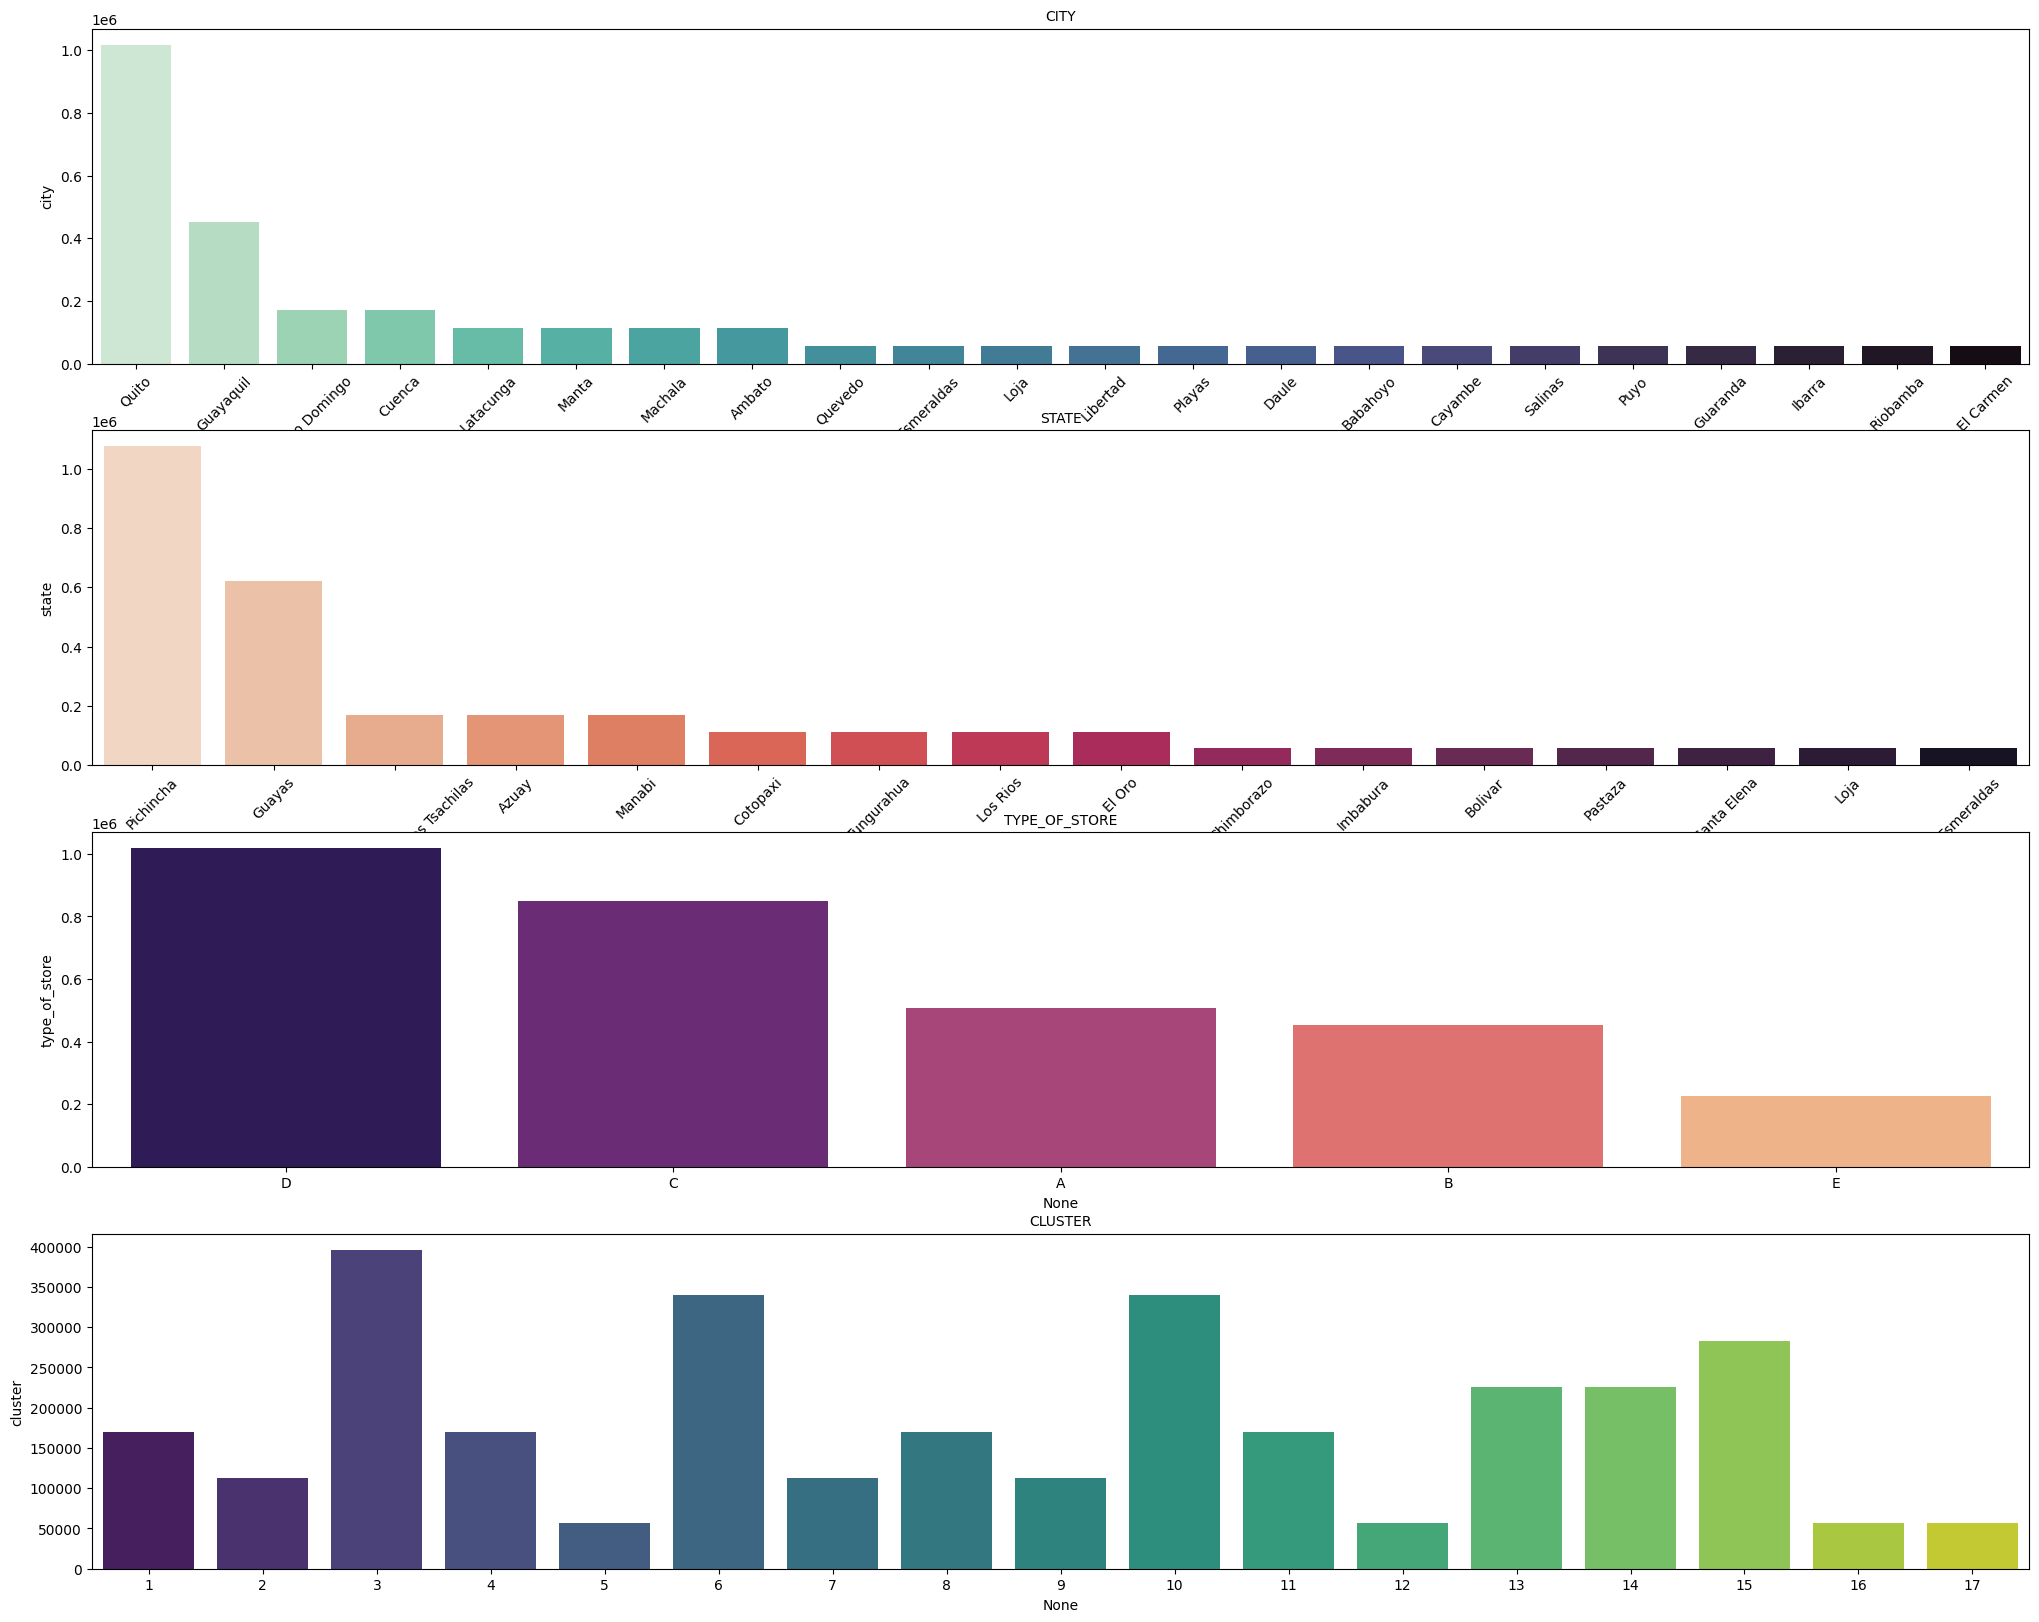

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(25,20))
plot_stats(train_with_all, "city", axes[0], "mako_r", 45)
plot_stats(train_with_all, "state", axes[1], "rocket_r", 45)
plot_stats(train_with_all, "type_of_store", axes[2], "magma", 0)
plot_stats(train_with_all, "cluster", axes[3], "viridis", 0)
plt.show()

In [ ]:
def plot_boxplot(palette, x, y, hue, ax, title):
    sns.set_theme(style="ticks", palette=palette)
    ax = sns.boxplot(x=x, y=y, hue=hue, ax=ax)
    ax.set_title(title, fontsize=18)

In [ ]:
oil['date'] = pd.to_datetime(oil['date'], format = "%Y-%m-%d")
transactions['date'] = pd.to_datetime(transactions['date'], format = "%Y-%m-%d")

##На диаграмме boxplot лучше видны некоторые закономерности в данных:
- мы видим что по стоимости бензина наибольшие колебания были в 2014 году
- чаще всего существнные колебания стоимости бензина отмечаются в последние месяцы в году


##Не знаю как проинтерпретировать транзакции на 3 графике.Вроде по месяца они распределены равномерно а на boxplot в декабре явно хвост больше

возможно в декабре количество транзакций в маоазинах сильно разниться, а по сумме выходит +-как и в другие месяцы, но почему так не понятно

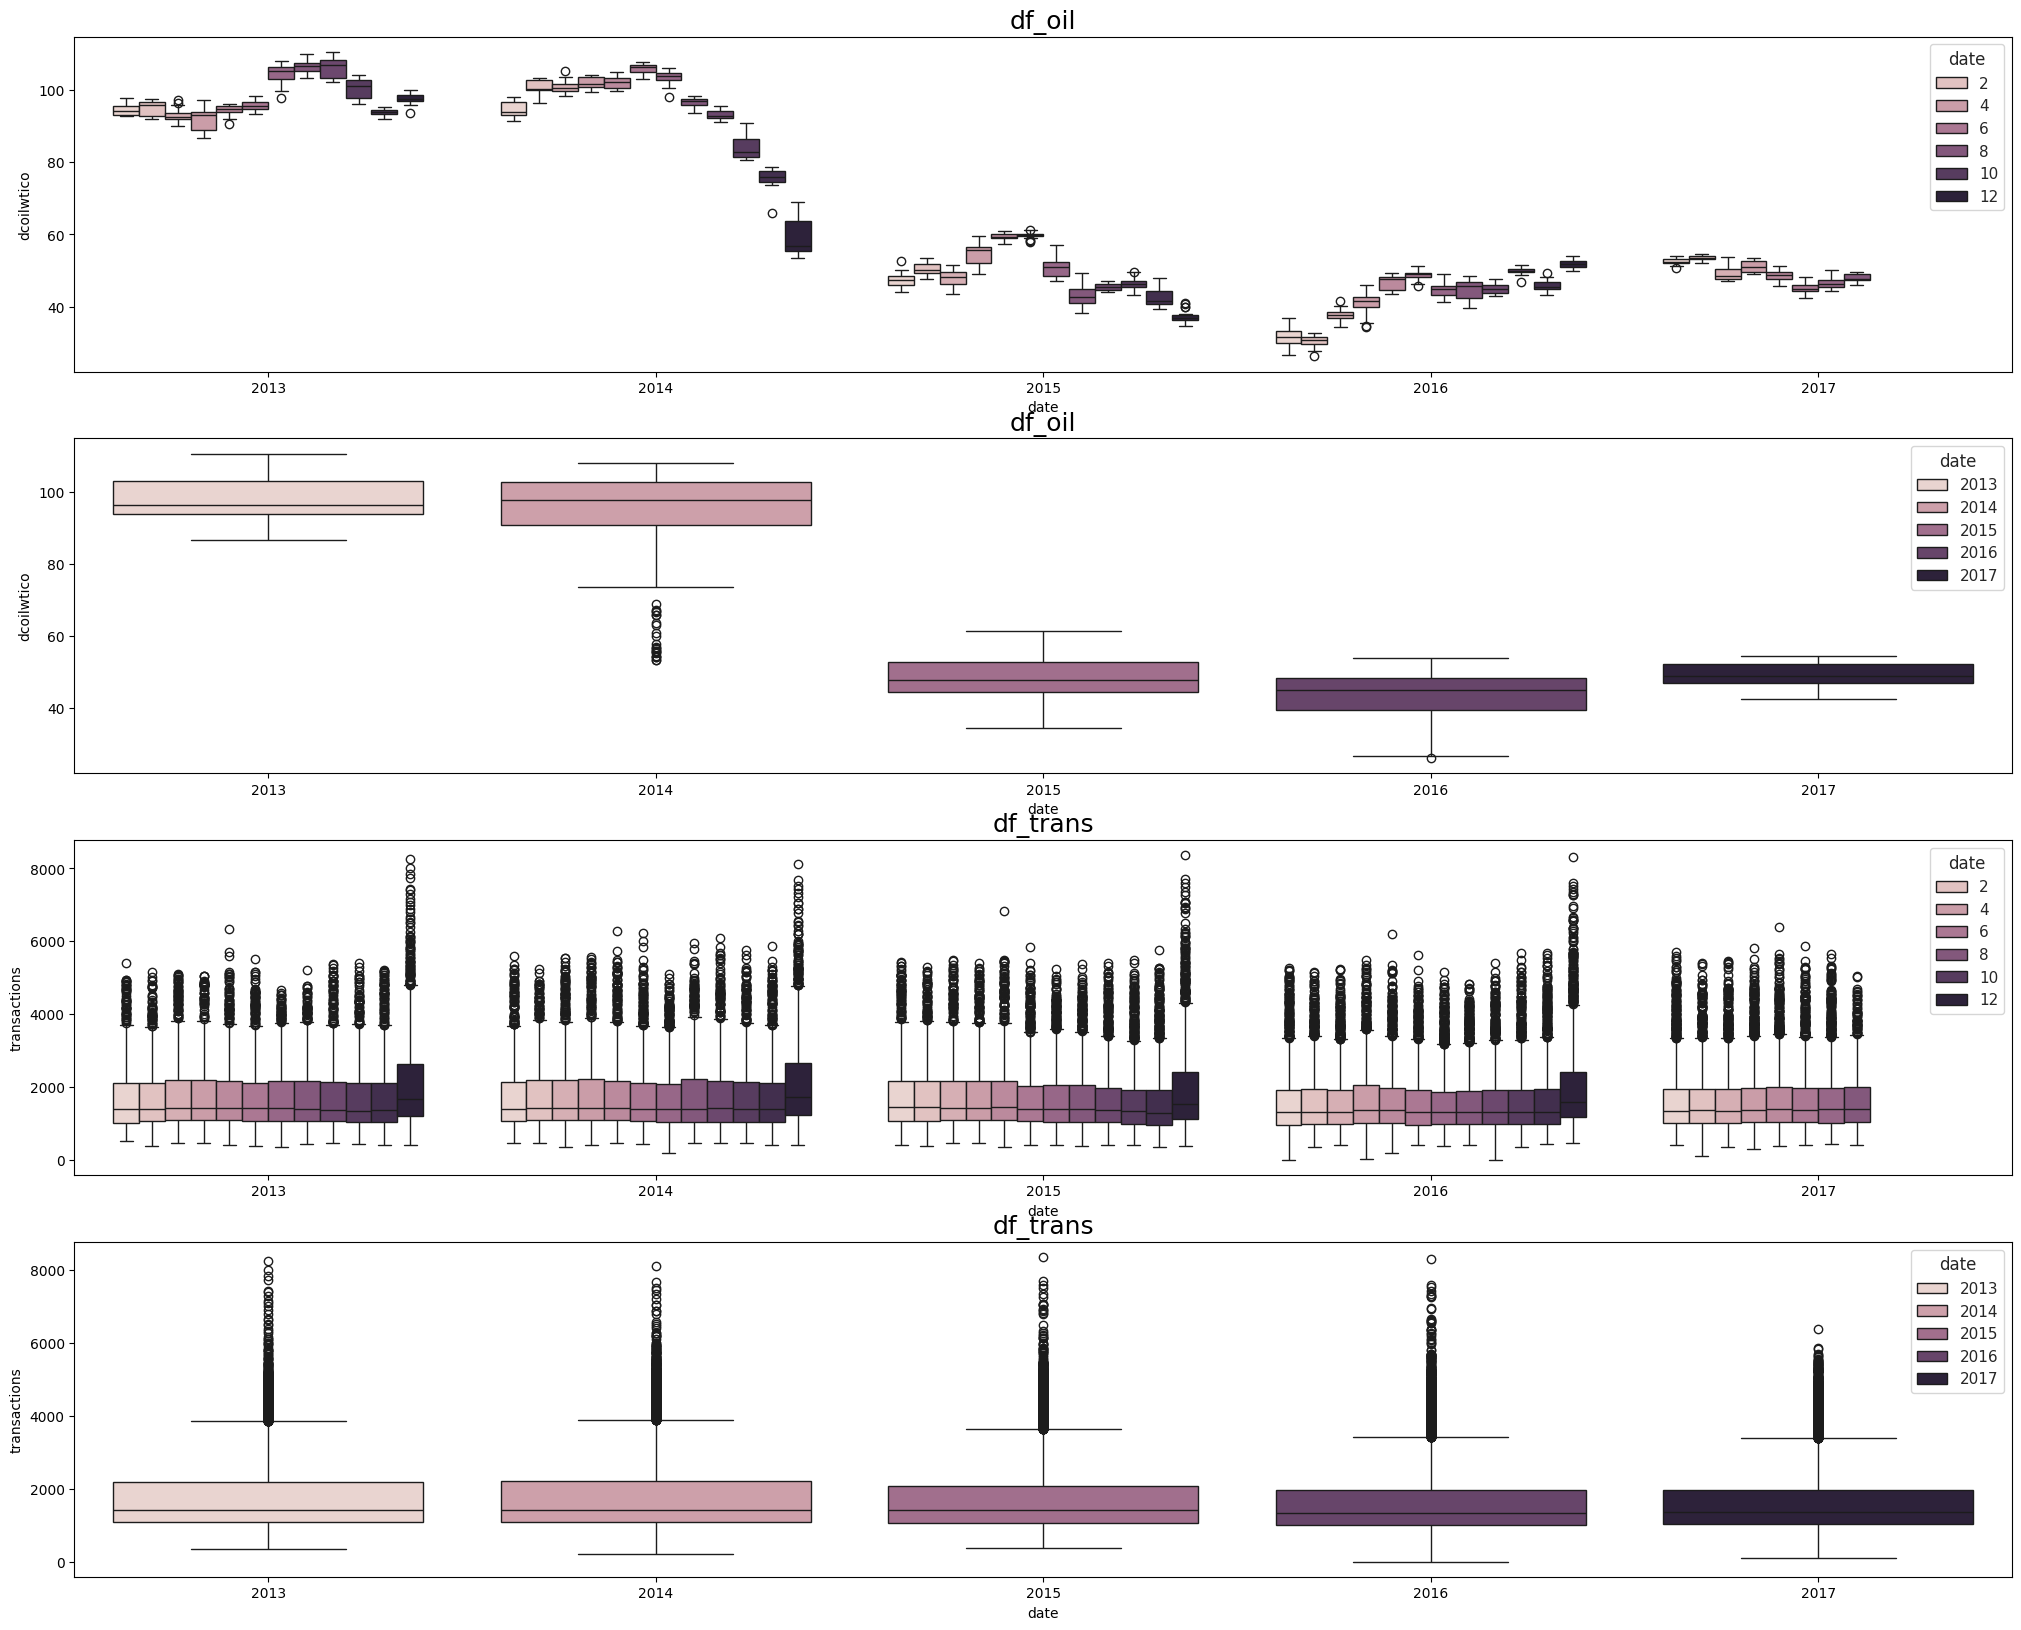

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(25,20))
plot_boxplot("pastel", oil['date'].dt.year, oil['dcoilwtico'], oil['date'].dt.month, axes[0], "df_oil")
plot_boxplot("pastel", oil['date'].dt.year, oil['dcoilwtico'], oil['date'].dt.year, axes[1], "df_oil")
plot_boxplot("pastel", transactions['date'].dt.year, transactions['transactions'], transactions['date'].dt.month, axes[2], "df_trans")
plot_boxplot("pastel", transactions['date'].dt.year, transactions['transactions'], transactions['date'].dt.year, axes[3], "df_trans")
plt.show()

In [ ]:
transactions['date'] = pd.to_datetime(transactions['date'])
transactions['Month'] = transactions['date'].dt.month_name()
transactions['Year'] = transactions['date'].dt.year
tran_by_year_month = transactions.groupby(['Year','Month'])[['transactions']].count().reset_index()
tran_by_year_month

,Year,Month,transactions
0,2013,April,1380
1,2013,August,1457
2,2013,December,1410
3,2013,February,1288
4,2013,January,1381
5,2013,July,1434
6,2013,June,1406
7,2013,March,1426
8,2013,May,1449
9,2013,November,1410


<Axes: ylabel='Month'>

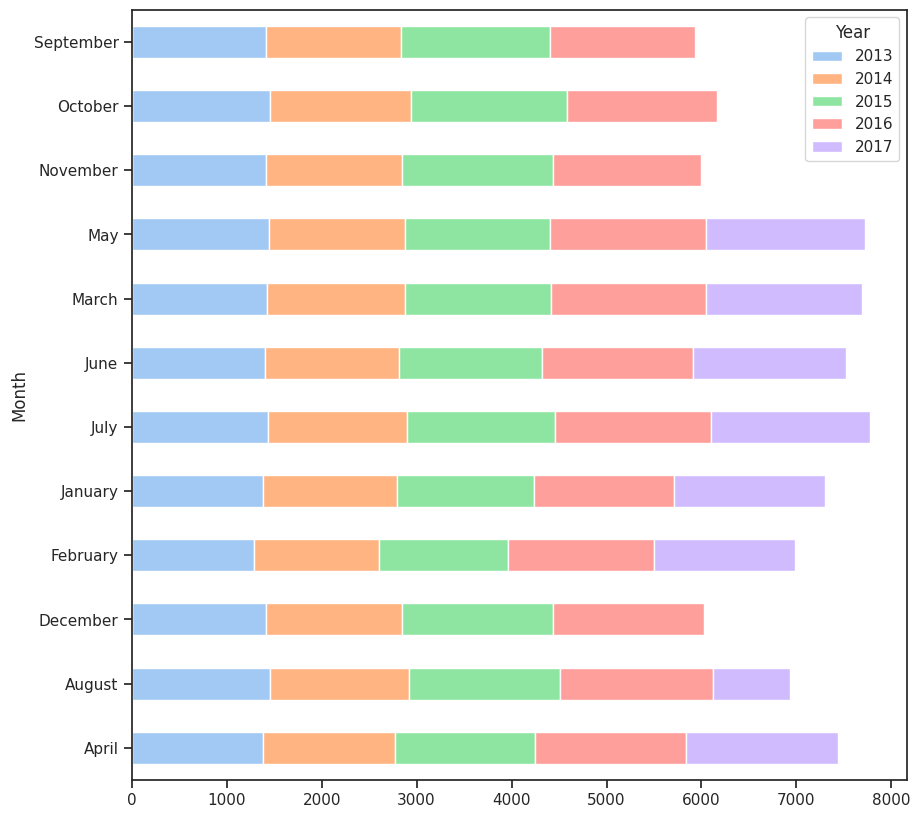

In [ ]:
tran_by_year_month.pivot(index ='Month', columns='Year', values ='transactions').plot.barh(figsize=[10,10], stacked=True)

##Для анализа взаимосвязи факторов влияющих на продажи рассмотрм корреляционую матрицу:
- сразу видим отрицательную корреляцию между стоимостью бензина по годам. Мы это наблюдали ранее.
- видна сильная корреляция продажами и onpromotion, который показывает общее количество товаров в семействе продуктов, которые рекламировались в магазине на заданную дату.
- также видна корреляция между транзакциями и продажами

In [ ]:
train_with_all.drop(columns = 'id', inplace = True)

<ipython-input-92-9415e267b165>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



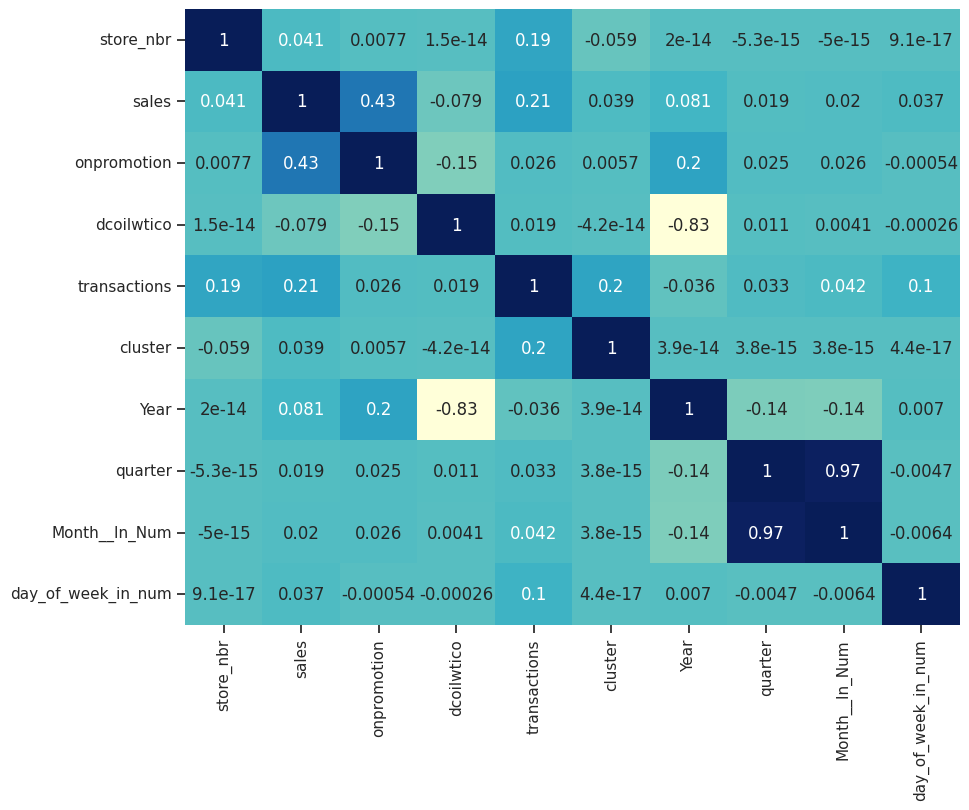

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train_with_all.corr(), annot=True, cmap="YlGnBu", cbar=False);

<Axes: xlabel='onpromotion', ylabel='sales'>

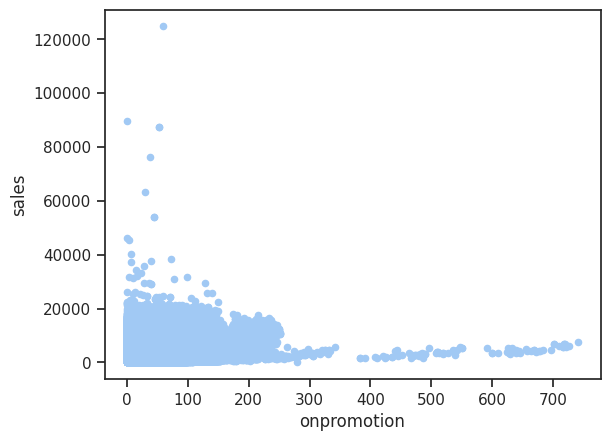

In [ ]:
train_with_all.plot.scatter(x='onpromotion', y='sales')

In [ ]:
data_clean= train_with_all[(train_with_all['sales']<=50000)&(train_with_all['onpromotion']<=350)]

**Если избавиться от выбросов, зависимость видна лучше**

<Axes: xlabel='onpromotion', ylabel='sales'>

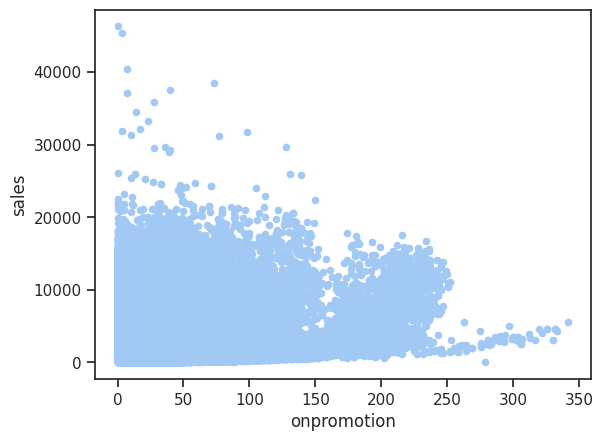

In [ ]:
data_clean.plot.scatter(x='onpromotion', y='sales')

In [ ]:
data_clean

,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type_of_store,cluster,Year,Month,quarter,day_of_week,Month__In_Num,day_of_week_in_num
0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday,1,2
1,2013-01-01,1,BABY CARE,0.000,0,NaN,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday,1,2
2,2013-01-01,1,BEAUTY,0.000,0,NaN,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday,1,2
3,2013-01-01,1,BEVERAGES,0.000,0,NaN,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday,1,2
4,2013-01-01,1,BOOKS,0.000,0,NaN,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday,8,2
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday,8,2
3054345,2017-08-15,9,PRODUCE,2419.729,148,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday,8,2
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday,8,2


##*Далее приступим к предподготовки данных для составления модели. Для этого обрабатывем NaN*

**Так как dcoilwtico представляет собой временной ряд, обрабатыаем его с помощью функций bfill() и ffill(), которые заполяют пропуски предыдущим или последующим значением**

In [ ]:
data_clean['dcoilwtico']=data_clean['dcoilwtico'].apply(lambda x: pd.to_numeric(x, errors='coerce')).bfill().ffill()

<ipython-input-97-e37590919baf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_clean

,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type_of_store,cluster,Year,Month,quarter,day_of_week,Month__In_Num,day_of_week_in_num
0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday,1,2
1,2013-01-01,1,BABY CARE,0.000,0,93.14,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday,1,2
2,2013-01-01,1,BEAUTY,0.000,0,93.14,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday,1,2
3,2013-01-01,1,BEVERAGES,0.000,0,93.14,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday,1,2
4,2013-01-01,1,BOOKS,0.000,0,93.14,NaN,Quito,Pichincha,D,13,2013,January,1,Tuesday,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday,8,2
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday,8,2
3054345,2017-08-15,9,PRODUCE,2419.729,148,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday,8,2
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,2155.0,Quito,Pichincha,B,6,2017,August,3,Tuesday,8,2


<Axes: title={'center': 'dcoilwtico'}, xlabel='date'>

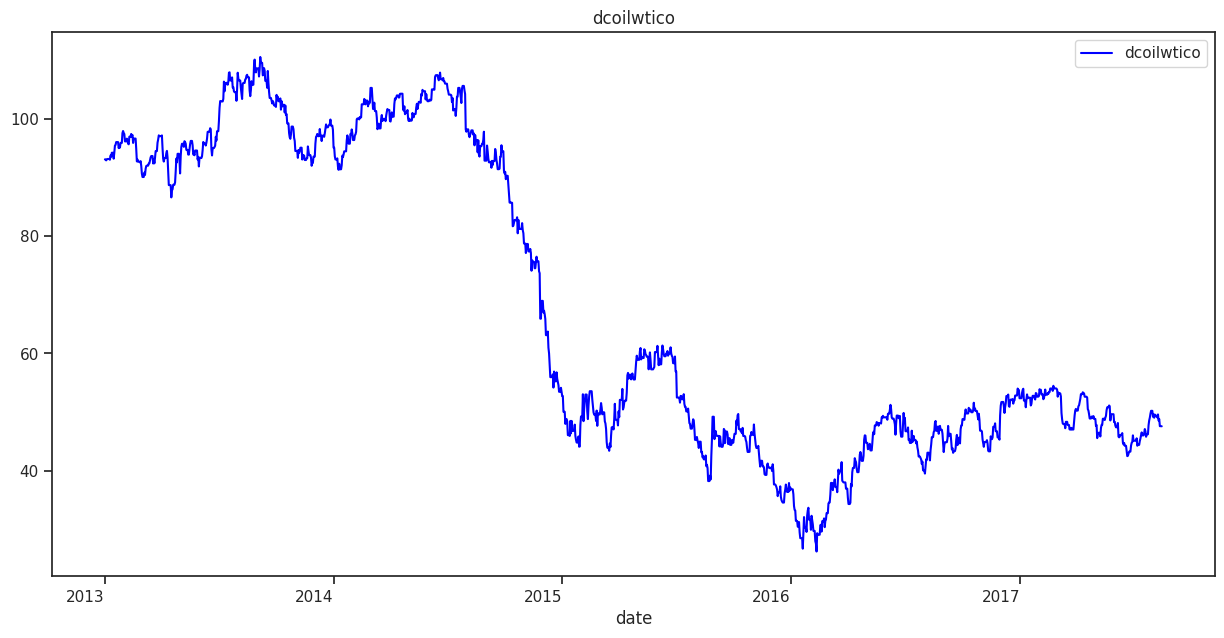

In [ ]:
data_clean.plot.line(x="date", y="dcoilwtico", color='blue', title ="dcoilwtico", rot=0, figsize=(15,8))

In [ ]:
data_clean["transactions"] = data_clean["transactions"].fillna(data_clean.groupby(['cluster', 'store_nbr'])['transactions'].transform('mean'))

<ipython-input-100-4861126858b0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Теперь мы можем убедиться, что все NaN обработаны**

In [ ]:
data_clean.isna().sum()

date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico            0
transactions          0
city                  0
state                 0
type_of_store         0
cluster               0
Year                  0
Month                 0
quarter               0
day_of_week           0
Month__In_Num         0
day_of_week_in_num    0
dtype: int64

In [ ]:
# Function for adding lag features
def lag_features(df, lags):
    for lag in lags:
        df[f"sales_t-{lag}"] = df.groupby(["store_nbr", "family"])["sales"].transform(
            lambda x: x.shift(lag))
    return df

In [ ]:
def random_noise(dataframe):
    return np.random.normal(scale=1.6, size=(len(dataframe),))

In [ ]:
# Function for rolling average features
def roll_mean_features(df, windows):
    for window in windows:
        df['sales_roll_mean_' + str(window)] = df.groupby(["store_nbr", "family"])['sales']. \
                                                          transform(
            lambda x: x.shift(16).rolling(window=window, min_periods=7, win_type="triang").mean()) + random_noise(
            df)
    return df

In [ ]:
# Function for ewm features
def get_dummies(df, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            df['sales_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                df.groupby(["store_nbr", "family"])['sales'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return df

In [ ]:
# Calendar features
def create_date_features(df):
    df['day_of_month'] = df.date.dt.day
    df['day_of_year'] = df.date.dt.dayofyear
    df['week_of_year'] = df.date.dt.weekofyear
    return df

In [ ]:
data = create_date_features(data_clean)
data = lag_features(data, lags = [ 7,10,13,16,18,20,22,30,31,90,180,364])
data = roll_mean_features(data,[7, 12, 16, 18, 30])
data = get_dummies(data, [0.95, 0.9, 0.8, 0.5],[7,15,30])

<ipython-input-109-f263e8c80367>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-109-f263e8c80367>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-109-f263e8c80367>:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

<ipython-input-109-f263e8c80367>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
data.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'transactions', 'city', 'state', 'type_of_store', 'cluster', 'Year',
       'Month', 'quarter', 'day_of_week', 'Month__In_Num',
       'day_of_week_in_num', 'day_of_month', 'day_of_year', 'week_of_year',
       'sales_t-7', 'sales_t-10', 'sales_t-13', 'sales_t-16', 'sales_t-18',
       'sales_t-20', 'sales_t-22', 'sales_t-30', 'sales_t-31', 'sales_t-90',
       'sales_t-180', 'sales_t-364', 'sales_roll_mean_7', 'sales_roll_mean_12',
       'sales_roll_mean_16', 'sales_roll_mean_18', 'sales_roll_mean_30',
       'sales_ewm_alpha_095_lag_7', 'sales_ewm_alpha_095_lag_15',
       'sales_ewm_alpha_095_lag_30', 'sales_ewm_alpha_09_lag_7',
       'sales_ewm_alpha_09_lag_15', 'sales_ewm_alpha_09_lag_30',
       'sales_ewm_alpha_08_lag_7', 'sales_ewm_alpha_08_lag_15',
       'sales_ewm_alpha_08_lag_30', 'sales_ewm_alpha_05_lag_7',
       'sales_ewm_alpha_05_lag_15', 'sales_ewm_alpha_05_lag_30'],
      dtype='obje

In [ ]:
data

,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type_of_store,...,sales_ewm_alpha_095_lag_30,sales_ewm_alpha_09_lag_7,sales_ewm_alpha_09_lag_15,sales_ewm_alpha_09_lag_30,sales_ewm_alpha_08_lag_7,sales_ewm_alpha_08_lag_15,sales_ewm_alpha_08_lag_30,sales_ewm_alpha_05_lag_7,sales_ewm_alpha_05_lag_15,sales_ewm_alpha_05_lag_30
0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,1522.362251,Quito,Pichincha,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,1,BABY CARE,0.000,0,93.14,1522.362251,Quito,Pichincha,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01,1,BEAUTY,0.000,0,93.14,1522.362251,Quito,Pichincha,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01,1,BEVERAGES,0.000,0,93.14,1522.362251,Quito,Pichincha,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01,1,BOOKS,0.000,0,93.14,1522.362251,Quito,Pichincha,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,47.57,2155.000000,Quito,Pichincha,B,...,568.342793,369.697832,474.348890,564.910993,383.970760,476.324564,556.377248,437.734022,466.832951,514.205186
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,2155.000000,Quito,Pichincha,B,...,126.753250,114.010850,70.280078,127.378549,115.753913,78.260842,128.059505,122.325801,95.360105,124.957403
3054345,2017-08-15,9,PRODUCE,2419.729,148,47.57,2155.000000,Quito,Pichincha,B,...,2026.020436,2239.195354,1552.053040,2007.645869,2181.927423,1580.249364,1963.919168,2010.439574,1601.379946,1799.260593
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,2155.000000,Quito,Pichincha,B,...,0.095601,168.047244,54.284072,0.184619,166.805105,52.072730,0.354174,164.040921,41.475828,0.922151


In [ ]:
data.isna().sum()

date                               0
store_nbr                          0
family                             0
sales                              0
onpromotion                        0
dcoilwtico                         0
transactions                       0
city                               0
state                              0
type_of_store                      0
cluster                            0
Year                               0
Month                              0
quarter                            0
day_of_week                        0
Month__In_Num                      0
day_of_week_in_num                 0
day_of_month                       0
day_of_year                        0
week_of_year                       0
sales_t-7                      12474
sales_t-10                     17820
sales_t-13                     23166
sales_t-16                     28512
sales_t-18                     32076
sales_t-20                     35640
sales_t-22                     39204
s

In [ ]:
data_filled = data.copy()
for col in data.columns:
    if data_filled[col].isnull().sum() > 0:
        data_filled[col] = data_filled.groupby(["store_nbr", "family"])[col].transform(lambda x: pd.to_numeric(x, errors='coerce')).bfill().ffill()


In [ ]:
data_filled.isna().sum()

date                          0
store_nbr                     0
family                        0
sales                         0
onpromotion                   0
dcoilwtico                    0
transactions                  0
city                          0
state                         0
type_of_store                 0
cluster                       0
Year                          0
Month                         0
quarter                       0
day_of_week                   0
Month__In_Num                 0
day_of_week_in_num            0
day_of_month                  0
day_of_year                   0
week_of_year                  0
sales_t-7                     0
sales_t-10                    0
sales_t-13                    0
sales_t-16                    0
sales_t-18                    0
sales_t-20                    0
sales_t-22                    0
sales_t-30                    0
sales_t-31                    0
sales_t-90                    0
sales_t-180                   0
sales_t-

In [ ]:
data_filled['family_num'] = data_filled.groupby('family')['sales'].transform('mean')

In [ ]:
data_to_model = data_filled[(data_filled['Year']>=2015)]
data_to_model

,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type_of_store,...,sales_ewm_alpha_09_lag_7,sales_ewm_alpha_09_lag_15,sales_ewm_alpha_09_lag_30,sales_ewm_alpha_08_lag_7,sales_ewm_alpha_08_lag_15,sales_ewm_alpha_08_lag_30,sales_ewm_alpha_05_lag_7,sales_ewm_alpha_05_lag_15,sales_ewm_alpha_05_lag_30,family_num
1316898,2015-01-01,1,AUTOMOTIVE,0.000,0,52.72,1522.362251,Quito,Pichincha,D,...,1.466911,0.675118,3.042621,1.893205,1.282148,3.145995,3.123016,2.492053,3.591541,6.119517
1316899,2015-01-01,1,BABY CARE,0.000,0,52.72,1522.362251,Quito,Pichincha,D,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111608
1316900,2015-01-01,1,BEAUTY,0.000,0,52.72,1522.362251,Quito,Pichincha,D,...,3.190970,2.109817,4.980241,3.367061,2.237246,4.922983,3.791564,2.640367,4.539734,3.734269
1316901,2015-01-01,1,BEVERAGES,0.000,0,52.72,1522.362251,Quito,Pichincha,D,...,1800.735547,2037.156325,2357.886217,1840.374792,2071.000576,2331.561660,1968.897379,2143.729121,2198.852962,2394.912701
1316902,2015-01-01,1,BOOKS,0.000,0,52.72,1522.362251,Quito,Pichincha,D,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,47.57,2155.000000,Quito,Pichincha,B,...,369.697832,474.348890,564.910993,383.970760,476.324564,556.377248,437.734022,466.832951,514.205186,351.078816
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,2155.000000,Quito,Pichincha,B,...,114.010850,70.280078,127.378549,115.753913,78.260842,128.059505,122.325801,95.360105,124.957403,96.878950
3054345,2017-08-15,9,PRODUCE,2419.729,148,47.57,2155.000000,Quito,Pichincha,B,...,2239.195354,1552.053040,2007.645869,2181.927423,1580.249364,1963.919168,2010.439574,1601.379946,1799.260593,1355.373698
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,2155.000000,Quito,Pichincha,B,...,168.047244,54.284072,0.184619,166.805105,52.072730,0.354174,164.040921,41.475828,0.922151,2.965491


In [ ]:
data_to_model['city'] = data_to_model.groupby('city')['sales'].transform('mean')

<ipython-input-118-ca63d940730a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_to_model['state'] = data_to_model.groupby('state')['sales'].transform('mean')

<ipython-input-119-58990e911d93>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_to_model['type_of_store'] = data_to_model.groupby('type_of_store')['sales'].transform('mean')

<ipython-input-120-59c1b9a9d9f4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_to_model.drop(columns = ['Month', 'day_of_week'], inplace = True)

<ipython-input-121-fe9c0fabc643>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#data_to_model.drop(columns = 'date', inplace = True)

In [ ]:
data_to_model.to_csv(r'drive/My Drive/Colab Notebooks/Kaggle/train_data_from-pet_project.csv', index= False )

In [3]:
data_to_model = pd.read_csv('drive/My Drive/Colab Notebooks/Kaggle/train_data_from-pet_project.csv')

In [4]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, mean_absolute_error, f1_score, r2_score, precision_score, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import pandas as pd
import re
from sklearn.model_selection import train_test_split

In [ ]:
data_to_model.columns

Index(['store_nbr', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'transactions', 'city', 'state', 'type_of_store', 'cluster', 'Year',
       'quarter', 'Month__In_Num', 'day_of_week_in_num', 'day_of_month',
       'day_of_year', 'week_of_year', 'sales_t-7', 'sales_t-10', 'sales_t-13',
       'sales_t-16', 'sales_t-18', 'sales_t-20', 'sales_t-22', 'sales_t-30',
       'sales_t-31', 'sales_t-90', 'sales_t-180', 'sales_t-364',
       'sales_roll_mean_7', 'sales_roll_mean_12', 'sales_roll_mean_16',
       'sales_roll_mean_18', 'sales_roll_mean_30', 'sales_ewm_alpha_095_lag_7',
       'sales_ewm_alpha_095_lag_15', 'sales_ewm_alpha_095_lag_30',
       'sales_ewm_alpha_09_lag_7', 'sales_ewm_alpha_09_lag_15',
       'sales_ewm_alpha_09_lag_30', 'sales_ewm_alpha_08_lag_7',
       'sales_ewm_alpha_08_lag_15', 'sales_ewm_alpha_08_lag_30',
       'sales_ewm_alpha_05_lag_7', 'sales_ewm_alpha_05_lag_15',
       'sales_ewm_alpha_05_lag_30', 'family_num'],
      dtype='object')

In [ ]:
data_to_model

,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type_of_store,cluster,...,sales_ewm_alpha_09_lag_7,sales_ewm_alpha_09_lag_15,sales_ewm_alpha_09_lag_30,sales_ewm_alpha_08_lag_7,sales_ewm_alpha_08_lag_15,sales_ewm_alpha_08_lag_30,sales_ewm_alpha_05_lag_7,sales_ewm_alpha_05_lag_15,sales_ewm_alpha_05_lag_30,family_num
0,1,AUTOMOTIVE,0.000,0,52.72,1522.362251,657.755686,653.075709,416.082589,13,...,1.466911,0.675118,3.042621,1.893205,1.282148,3.145995,3.123016,2.492053,3.591541,6.119517
1,1,BABY CARE,0.000,0,52.72,1522.362251,657.755686,653.075709,416.082589,13,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111608
2,1,BEAUTY,0.000,0,52.72,1522.362251,657.755686,653.075709,416.082589,13,...,3.190970,2.109817,4.980241,3.367061,2.237246,4.922983,3.791564,2.640367,4.539734,3.734269
3,1,BEVERAGES,0.000,0,52.72,1522.362251,657.755686,653.075709,416.082589,13,...,1800.735547,2037.156325,2357.886217,1840.374792,2071.000576,2331.561660,1968.897379,2143.729121,2198.852962,2394.912701
4,1,BOOKS,0.000,0,52.72,1522.362251,657.755686,653.075709,416.082589,13,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737355,9,POULTRY,438.133,0,47.57,2155.000000,657.755686,653.075709,402.798132,6,...,369.697832,474.348890,564.910993,383.970760,476.324564,556.377248,437.734022,466.832951,514.205186,351.078816
1737356,9,PREPARED FOODS,154.553,1,47.57,2155.000000,657.755686,653.075709,402.798132,6,...,114.010850,70.280078,127.378549,115.753913,78.260842,128.059505,122.325801,95.360105,124.957403,96.878950
1737357,9,PRODUCE,2419.729,148,47.57,2155.000000,657.755686,653.075709,402.798132,6,...,2239.195354,1552.053040,2007.645869,2181.927423,1580.249364,1963.919168,2010.439574,1601.379946,1799.260593,1355.373698
1737358,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,2155.000000,657.755686,653.075709,402.798132,6,...,168.047244,54.284072,0.184619,166.805105,52.072730,0.354174,164.040921,41.475828,0.922151,2.965491


##Baseline model

In [ ]:
features= data_to_model[['store_nbr',  'onpromotion', 'dcoilwtico',
       'transactions', 'city', 'state', 'type_of_store', 'cluster', 'Year',
       'quarter', 'Month__In_Num', 'day_of_week_in_num', 'day_of_month',
       'day_of_year', 'week_of_year', 'sales_t-7', 'sales_t-10', 'sales_t-13',
       'sales_t-16', 'sales_t-18', 'sales_t-20', 'sales_t-22', 'sales_t-30',
       'sales_t-31', 'sales_t-90', 'sales_t-180', 'sales_t-364',
       'sales_roll_mean_7', 'sales_roll_mean_12', 'sales_roll_mean_16',
       'sales_roll_mean_18', 'sales_roll_mean_30', 'sales_ewm_alpha_095_lag_7',
       'sales_ewm_alpha_095_lag_15', 'sales_ewm_alpha_095_lag_30',
       'sales_ewm_alpha_09_lag_7', 'sales_ewm_alpha_09_lag_15',
       'sales_ewm_alpha_09_lag_30', 'sales_ewm_alpha_08_lag_7',
       'sales_ewm_alpha_08_lag_15', 'sales_ewm_alpha_08_lag_30',
       'sales_ewm_alpha_05_lag_7', 'sales_ewm_alpha_05_lag_15',
       'sales_ewm_alpha_05_lag_30', 'family_num']]
targer = data_to_model[['sales']]

x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(features, targer, test_size = 0.3,  random_state=2)

reg_model = DecisionTreeRegressor(max_depth= 10, min_samples_split = 7, min_samples_leaf = 5, random_state=2)
reg_model.fit(x_train_t, y_train_t)

pred_train = reg_model.predict(x_train_t)
pred_test = reg_model.predict(x_test_t)

print("Точность на трейне: \n{}".format(mean_absolute_error(y_train_t, pred_train)))
print("Точность на тесте: \n{}".format(mean_absolute_error(y_test_t, pred_test)))

Точность на трейне: 
72.91620058356602
Точность на тесте: 
75.02725610966672


In [ ]:
!pip install eli5
from eli5.sklearn import PermutationImportance

In [ ]:
import eli5

In [ ]:
permutation = PermutationImportance(reg_model, scoring='neg_mean_squared_error', n_iter=5, random_state=17).fit(x_train_t, y_train_t)
eli5.show_weights(permutation, feature_names=x_train_t.columns.tolist(), top=len(x_train_t.columns.tolist()))


Weight,Feature
1261702.7624 ± 3975.0056,sales_ewm_alpha_08_lag_7
644635.7996 ± 6099.4062,sales_ewm_alpha_05_lag_7
502557.9079 ± 11151.9959,onpromotion
179148.7327 ± 1824.0373,transactions
142797.3867 ± 2020.5156,sales_t-180
95755.1507 ± 2286.2739,sales_ewm_alpha_095_lag_7
43943.2808 ± 479.2879,family_num
27456.6681 ± 889.6100,day_of_month
21119.3969 ± 169.9462,sales_roll_mean_30
16370.9064 ± 404.5390,day_of_week_in_num


In [5]:
data_to_model.drop(columns = ['sales_t-30',
	'Month__In_Num',
	'sales_ewm_alpha_09_lag_30',
	'Year',
'quarter'], inplace = True)

In [ ]:
data_to_model.columns

Index(['store_nbr', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'transactions', 'city', 'type_of_store', 'cluster',
       'day_of_week_in_num', 'day_of_month', 'day_of_year', 'week_of_year',
       'sales_t-7', 'sales_t-10', 'sales_t-13', 'sales_t-16', 'sales_t-18',
       'sales_t-20', 'sales_t-22', 'sales_t-30', 'sales_t-31', 'sales_t-90',
       'sales_t-180', 'sales_t-364', 'sales_roll_mean_7', 'sales_roll_mean_12',
       'sales_roll_mean_16', 'sales_roll_mean_18', 'sales_roll_mean_30',
       'sales_ewm_alpha_095_lag_7', 'sales_ewm_alpha_095_lag_15',
       'sales_ewm_alpha_095_lag_30', 'sales_ewm_alpha_09_lag_7',
       'sales_ewm_alpha_09_lag_15', 'sales_ewm_alpha_08_lag_7',
       'sales_ewm_alpha_08_lag_15', 'sales_ewm_alpha_08_lag_30',
       'sales_ewm_alpha_05_lag_7', 'sales_ewm_alpha_05_lag_15',
       'sales_ewm_alpha_05_lag_30', 'family_num'],
      dtype='object')

In [ ]:
data_to_model.to_csv(r'drive/My Drive/Colab Notebooks/Kaggle/data_from_pet_project_ready_to_make_model.csv', index= False )

In [6]:
data_to_model = pd.read_csv('drive/My Drive/Colab Notebooks/Kaggle/data_from_pet_project_ready_to_make_model.csv')

In [ ]:
data_to_model['date'].max()

'2017-08-15'

##Так как используются лаговые переменные период прогнозирования не может превышать длительность минимального лага. Поэтому для прогноза будут использоваться данные за последнюю неделю.

In [7]:
train_to_model = data_to_model[data_to_model['date']<= '2017-08-08']

In [8]:
test_to_model = data_to_model[data_to_model['date']> '2017-08-08']

In [ ]:
test_to_model.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'transactions', 'city', 'state', 'type_of_store', 'cluster',
       'day_of_week_in_num', 'day_of_month', 'day_of_year', 'week_of_year',
       'sales_t-7', 'sales_t-10', 'sales_t-13', 'sales_t-16', 'sales_t-18',
       'sales_t-20', 'sales_t-22', 'sales_t-31', 'sales_t-90', 'sales_t-180',
       'sales_t-364', 'sales_roll_mean_7', 'sales_roll_mean_12',
       'sales_roll_mean_16', 'sales_roll_mean_18', 'sales_roll_mean_30',
       'sales_ewm_alpha_095_lag_7', 'sales_ewm_alpha_095_lag_15',
       'sales_ewm_alpha_095_lag_30', 'sales_ewm_alpha_09_lag_7',
       'sales_ewm_alpha_09_lag_15', 'sales_ewm_alpha_08_lag_7',
       'sales_ewm_alpha_08_lag_15', 'sales_ewm_alpha_08_lag_30',
       'sales_ewm_alpha_05_lag_7', 'sales_ewm_alpha_05_lag_15',
       'sales_ewm_alpha_05_lag_30', 'family_num'],
      dtype='object')

In [ ]:
x_train = train_to_model[['store_nbr', 'onpromotion', 'dcoilwtico',
       'transactions', 'city', 'state', 'type_of_store', 'cluster',
       'day_of_week_in_num', 'day_of_month', 'day_of_year', 'week_of_year',
       'sales_t-7', 'sales_t-10', 'sales_t-13', 'sales_t-16', 'sales_t-18',
       'sales_t-20', 'sales_t-22', 'sales_t-31', 'sales_t-90', 'sales_t-180',
       'sales_t-364', 'sales_roll_mean_7', 'sales_roll_mean_12',
       'sales_roll_mean_16', 'sales_roll_mean_18', 'sales_roll_mean_30',
       'sales_ewm_alpha_095_lag_7', 'sales_ewm_alpha_095_lag_15',
       'sales_ewm_alpha_095_lag_30', 'sales_ewm_alpha_09_lag_7',
       'sales_ewm_alpha_09_lag_15', 'sales_ewm_alpha_08_lag_7',
       'sales_ewm_alpha_08_lag_15', 'sales_ewm_alpha_08_lag_30',
       'sales_ewm_alpha_05_lag_7', 'sales_ewm_alpha_05_lag_15',
       'sales_ewm_alpha_05_lag_30', 'family_num']]
y_train = train_to_model['sales']

x_test = test_to_model[['store_nbr', 'onpromotion', 'dcoilwtico',
       'transactions', 'city', 'state', 'type_of_store', 'cluster',
       'day_of_week_in_num', 'day_of_month', 'day_of_year', 'week_of_year',
       'sales_t-7', 'sales_t-10', 'sales_t-13', 'sales_t-16', 'sales_t-18',
       'sales_t-20', 'sales_t-22', 'sales_t-31', 'sales_t-90', 'sales_t-180',
       'sales_t-364', 'sales_roll_mean_7', 'sales_roll_mean_12',
       'sales_roll_mean_16', 'sales_roll_mean_18', 'sales_roll_mean_30',
       'sales_ewm_alpha_095_lag_7', 'sales_ewm_alpha_095_lag_15',
       'sales_ewm_alpha_095_lag_30', 'sales_ewm_alpha_09_lag_7',
       'sales_ewm_alpha_09_lag_15', 'sales_ewm_alpha_08_lag_7',
       'sales_ewm_alpha_08_lag_15', 'sales_ewm_alpha_08_lag_30',
       'sales_ewm_alpha_05_lag_7', 'sales_ewm_alpha_05_lag_15',
       'sales_ewm_alpha_05_lag_30', 'family_num']]
y_test = test_to_model['sales']

In [9]:
columns = ['store_nbr', 'onpromotion', 'dcoilwtico',
       'transactions', 'city', 'state', 'type_of_store', 'cluster',
       'day_of_week_in_num', 'day_of_month', 'day_of_year', 'week_of_year',
       'sales_t-7', 'sales_t-10', 'sales_t-13', 'sales_t-16', 'sales_t-18',
       'sales_t-20', 'sales_t-22', 'sales_t-31', 'sales_t-90', 'sales_t-180',
       'sales_t-364', 'sales_roll_mean_7', 'sales_roll_mean_12',
       'sales_roll_mean_16', 'sales_roll_mean_18', 'sales_roll_mean_30',
       'sales_ewm_alpha_095_lag_7', 'sales_ewm_alpha_095_lag_15',
       'sales_ewm_alpha_095_lag_30', 'sales_ewm_alpha_09_lag_7',
       'sales_ewm_alpha_09_lag_15', 'sales_ewm_alpha_08_lag_7',
       'sales_ewm_alpha_08_lag_15', 'sales_ewm_alpha_08_lag_30',
       'sales_ewm_alpha_05_lag_7', 'sales_ewm_alpha_05_lag_15',
       'sales_ewm_alpha_05_lag_30', 'family_num']

In [ ]:
rf = RandomForestRegressor(n_estimators=200, max_depth= 7, min_samples_split = 7, min_samples_leaf = 5, random_state=17)


df_predict_train_rf = pd.DataFrame()
df_predict_test_rf = pd.DataFrame()
# словарь с обученными моделями по категориям
models_rf = {}

for article_category in train_to_model['family'].unique():
    print ('Prossecing category ', article_category)

    x_train_rf = train_to_model[train_to_model['family']==article_category][columns]

    y_train_rf= train_to_model[train_to_model['family']==article_category][['sales']]

    x_test_rf = test_to_model[test_to_model['family']==article_category][columns]

    y_test_rf= test_to_model[test_to_model['family']==article_category][['sales']]

    rf.fit(x_train_rf, y_train_rf)
#     сохраняем обученные модели в словарь
    models_rf[article_category] = rf

    x_train_rf['pred'] = rf.predict(x_train_rf)
    x_train_rf['sales'] = y_train_rf
    df_predict_train_rf = pd.concat([df_predict_train_rf, x_train_rf])


    x_test_rf['pred'] = rf.predict(x_test_rf)
    x_test_rf['sales'] = y_test_rf
    df_predict_test_rf = pd.concat([df_predict_test_rf, x_test_rf])


#     Метрика по категории
    print("Точность на трейне в категории {}: \n{}".format(article_category, mean_absolute_error(y_train_rf, x_train_rf['pred'])))
    print("Точность на тесте в категории {}: \n{}".format(article_category, mean_absolute_error(y_test_rf, x_test_rf['pred'])))
    print('-'*50)

# Общая метрика по всем категориям
print("Общая точность на трейне: \n{}".format(mean_absolute_error(df_predict_train_rf['sales'], df_predict_train_rf['pred'])))
print("Общая точность на тесте: \n{}".format(mean_absolute_error(df_predict_test_rf['sales'], df_predict_test_rf['pred'])))

Prossecing category  AUTOMOTIVE


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории AUTOMOTIVE: 
2.8149884731858044
Точность на тесте в категории AUTOMOTIVE: 
2.914688817085859
--------------------------------------------------
Prossecing category  BABY CARE


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории BABY CARE: 
0.22578391679709303
Точность на тесте в категории BABY CARE: 
0.26159052273174127
--------------------------------------------------
Prossecing category  BEAUTY


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории BEAUTY: 
1.8758262778995796
Точность на тесте в категории BEAUTY: 
2.749529272214866
--------------------------------------------------
Prossecing category  BEVERAGES


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории BEVERAGES: 
461.5836089350637
Точность на тесте в категории BEVERAGES: 
610.0496376088058
--------------------------------------------------
Prossecing category  BOOKS


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории BOOKS: 
0.09300380029681986
Точность на тесте в категории BOOKS: 
0.030766610228071083
--------------------------------------------------
Prossecing category  BREAD/BAKERY


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории BREAD/BAKERY: 
67.81936687631091
Точность на тесте в категории BREAD/BAKERY: 
76.85196976680017
--------------------------------------------------
Prossecing category  CELEBRATION


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории CELEBRATION: 
4.762327858140375
Точность на тесте в категории CELEBRATION: 
5.4308936909750525
--------------------------------------------------
Prossecing category  CLEANING


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории CLEANING: 
170.91363948690866
Точность на тесте в категории CLEANING: 
225.84677300281533
--------------------------------------------------
Prossecing category  DAIRY


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории DAIRY: 
106.87932246423915
Точность на тесте в категории DAIRY: 
114.26846298958161
--------------------------------------------------
Prossecing category  DELI


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории DELI: 
44.74216103865173
Точность на тесте в категории DELI: 
45.023046367730814
--------------------------------------------------
Prossecing category  EGGS


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории EGGS: 
38.90232839384483
Точность на тесте в категории EGGS: 
36.83701590565779
--------------------------------------------------
Prossecing category  FROZEN FOODS


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории FROZEN FOODS: 
40.843198821281625
Точность на тесте в категории FROZEN FOODS: 
31.07348377088995
--------------------------------------------------
Prossecing category  GROCERY I


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории GROCERY I: 
571.9395015996305
Точность на тесте в категории GROCERY I: 
580.5147273798373
--------------------------------------------------
Prossecing category  GROCERY II


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории GROCERY II: 
7.736789163254172
Точность на тесте в категории GROCERY II: 
9.558323683263456
--------------------------------------------------
Prossecing category  HARDWARE


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории HARDWARE: 
0.9906762972579063
Точность на тесте в категории HARDWARE: 
1.1186915370196566
--------------------------------------------------
Prossecing category  HOME AND KITCHEN I


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории HOME AND KITCHEN I: 
13.048280868537205
Точность на тесте в категории HOME AND KITCHEN I: 
11.046166692230655
--------------------------------------------------
Prossecing category  HOME AND KITCHEN II


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории HOME AND KITCHEN II: 
10.707338173477748
Точность на тесте в категории HOME AND KITCHEN II: 
11.612366332020297
--------------------------------------------------
Prossecing category  HOME APPLIANCES


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории HOME APPLIANCES: 
0.4521370735186792
Точность на тесте в категории HOME APPLIANCES: 
0.3287600753496353
--------------------------------------------------
Prossecing category  HOME CARE


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории HOME CARE: 
40.78533763704966
Точность на тесте в категории HOME CARE: 
48.77608441385874
--------------------------------------------------
Prossecing category  LADIESWEAR


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории LADIESWEAR: 
3.429217099502458
Точность на тесте в категории LADIESWEAR: 
4.158262073063444
--------------------------------------------------
Prossecing category  LAWN AND GARDEN


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории LAWN AND GARDEN: 
3.3221128566863607
Точность на тесте в категории LAWN AND GARDEN: 
5.139498395880781
--------------------------------------------------
Prossecing category  LINGERIE


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории LINGERIE: 
3.298989157595123
Точность на тесте в категории LINGERIE: 
4.066704842800271
--------------------------------------------------
Prossecing category  LIQUOR,WINE,BEER


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории LIQUOR,WINE,BEER: 
35.531432197700894
Точность на тесте в категории LIQUOR,WINE,BEER: 
37.9349997150238
--------------------------------------------------
Prossecing category  MAGAZINES


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории MAGAZINES: 
2.1646078664188524
Точность на тесте в категории MAGAZINES: 
3.036380694131569
--------------------------------------------------
Prossecing category  MEATS


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории MEATS: 
56.060556143321264
Точность на тесте в категории MEATS: 
64.84968763215763
--------------------------------------------------
Prossecing category  PERSONAL CARE


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории PERSONAL CARE: 
53.38504820217712
Точность на тесте в категории PERSONAL CARE: 
51.83696897204326
--------------------------------------------------
Prossecing category  PET SUPPLIES


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории PET SUPPLIES: 
2.0379241708764977
Точность на тесте в категории PET SUPPLIES: 
2.7856025923825745
--------------------------------------------------
Prossecing category  PLAYERS AND ELECTRONICS


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории PLAYERS AND ELECTRONICS: 
3.0772862589879706
Точность на тесте в категории PLAYERS AND ELECTRONICS: 
3.646032972615629
--------------------------------------------------
Prossecing category  POULTRY


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории POULTRY: 
61.57507155180723
Точность на тесте в категории POULTRY: 
73.83180432236199
--------------------------------------------------
Prossecing category  PREPARED FOODS


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории PREPARED FOODS: 
17.397836729988814
Точность на тесте в категории PREPARED FOODS: 
17.046238831610157
--------------------------------------------------
Prossecing category  PRODUCE


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории PRODUCE: 
276.1360323413466
Точность на тесте в категории PRODUCE: 
284.57966750470143
--------------------------------------------------
Prossecing category  SCHOOL AND OFFICE SUPPLIES


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории SCHOOL AND OFFICE SUPPLIES: 
2.1464959233096486
Точность на тесте в категории SCHOOL AND OFFICE SUPPLIES: 
18.108635555651965
--------------------------------------------------
Prossecing category  SEAFOOD


<ipython-input-8-126f25bfffd7>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_rf, y_train_rf)


Точность на трейне в категории SEAFOOD: 
5.315441873272509
Точность на тесте в категории SEAFOOD: 
5.017478379763666
--------------------------------------------------
Общая точность на трейне: 
63.97360429465289
Общая точность на тесте: 
72.43427093706923


In [ ]:
import pickle

with open("/content/drive/My Drive/Colab Notebooks/Kaggle/models_rf_final.pickle", "wb") as file:
      pickle.dump(models_rf, file)

with open("/content/drive/My Drive/Colab Notebooks/Kaggle/models_rf_final.pickle", "rb") as file:
      models_rf = pickle.load(file)

In [10]:
dtr = DecisionTreeRegressor(max_depth= 10, min_samples_split = 7, min_samples_leaf = 5, random_state=2)


df_predict_train_dtr = pd.DataFrame()
df_predict_test_dtr = pd.DataFrame()
# словарь с обученными моделями по категориям
models_dtr = {}

for article_category in data_to_model['family'].unique():
    print ('Prossecing category ', article_category)

    x_train_cat_dtr = train_to_model[train_to_model['family']==article_category][columns]

    y_train_cat_dtr= train_to_model[train_to_model['family']==article_category][['sales']]

    x_test_cat_dtr = test_to_model[test_to_model['family']==article_category][columns]

    y_test_cat_dtr= test_to_model[test_to_model['family']==article_category][['sales']]

    dtr.fit(x_train_cat_dtr, y_train_cat_dtr)
#     сохраняем обученные модели в словарь
    models_dtr[article_category] = dtr

    x_train_cat_dtr['pred'] = dtr.predict(x_train_cat_dtr)
    x_train_cat_dtr['sales'] = y_train_cat_dtr
    df_predict_train_dtr = pd.concat([df_predict_train_dtr, x_train_cat_dtr])


    x_test_cat_dtr['pred'] = dtr.predict(x_test_cat_dtr)
    x_test_cat_dtr['sales'] = y_test_cat_dtr
    df_predict_test_dtr = pd.concat([df_predict_test_dtr, x_test_cat_dtr])


#     Метрика по категории
    print("Точность на трейне в категории {}: \n{}".format(article_category, mean_absolute_error(y_train_cat_dtr, x_train_cat_dtr['pred'])))
    print("Точность на тесте в категории {}: \n{}".format(article_category, mean_absolute_error(y_test_cat_dtr, x_test_cat_dtr['pred'])))
    print('-'*50)

# Общая метрика по всем категориям
print("Общая точность на трейне: \n{}".format(mean_absolute_error(df_predict_train_dtr['sales'], df_predict_train_dtr['pred'])))
print("Общая точность на тесте: \n{}".format(mean_absolute_error(df_predict_test_dtr['sales'], df_predict_test_dtr['pred'])))

Prossecing category  AUTOMOTIVE
Точность на трейне в категории AUTOMOTIVE: 
2.685919362566635
Точность на тесте в категории AUTOMOTIVE: 
2.9415291040255434
--------------------------------------------------
Prossecing category  BABY CARE
Точность на трейне в категории BABY CARE: 
0.2128112805151053
Точность на тесте в категории BABY CARE: 
0.2674109707558206
--------------------------------------------------
Prossecing category  BEAUTY
Точность на трейне в категории BEAUTY: 
1.7485566098640823
Точность на тесте в категории BEAUTY: 
2.7840758660391534
--------------------------------------------------
Prossecing category  BEVERAGES
Точность на трейне в категории BEVERAGES: 
425.8995236843141
Точность на тесте в категории BEVERAGES: 
596.5808131022999
--------------------------------------------------
Prossecing category  BOOKS
Точность на трейне в категории BOOKS: 
0.07692972368844285
Точность на тесте в категории BOOKS: 
0.029471404233611477
--------------------------------------------

In [ ]:
lr = LinearRegression()


df_predict_train_lr = pd.DataFrame()
df_predict_test_lr = pd.DataFrame()
# словарь с обученными моделями по категориям
models_lr = {}

for article_category in data_to_model['family'].unique():
    print ('Prossecing category ', article_category)

    x_train_cat_lr = train_to_model[train_to_model['family']==article_category][columns]

    y_train_cat_lr= train_to_model[train_to_model['family']==article_category][['sales']]

    x_test_cat_lr = test_to_model[test_to_model['family']==article_category][columns]

    y_test_cat_lr= test_to_model[test_to_model['family']==article_category][['sales']]

    lr.fit(x_train_cat_lr, y_train_cat_lr)
#     сохраняем обученные модели в словарь
    models_lr[article_category] = lr

    x_train_cat_lr['pred'] = lr.predict(x_train_cat_lr)
    x_train_cat_lr['sales'] = y_train_cat_lr
    df_predict_train_lr = pd.concat([df_predict_train_lr, x_train_cat_lr])


    x_test_cat_lr['pred'] = lr.predict(x_test_cat_lr)
    x_test_cat_lr['sales'] = y_test_cat_lr
    df_predict_test_lr = pd.concat([df_predict_test_lr, x_test_cat_lr])


#     Метрика по категории
    print("Точность на трейне в категории {}: \n{}".format(article_category, mean_absolute_error(y_train_cat_lr, x_train_cat_lr['pred'])))
    print("Точность на тесте в категории {}: \n{}".format(article_category, mean_absolute_error(y_test_cat_lr, x_test_cat_lr['pred'])))
    print('-'*50)

# Общая метрика по всем категориям
print("Общая точность на трейне: \n{}".format(mean_absolute_error(df_predict_train_lr['sales'], df_predict_train_lr['pred'])))
print("Общая точность на тесте: \n{}".format(mean_absolute_error(df_predict_test_lr['sales'], df_predict_test_lr['pred'])))

Prossecing category  AUTOMOTIVE
Точность на трейне в категории AUTOMOTIVE: 
2.987333976908115
Точность на тесте в категории AUTOMOTIVE: 
2.836202398393895
--------------------------------------------------
Prossecing category  BABY CARE
Точность на трейне в категории BABY CARE: 
0.2501761366360446
Точность на тесте в категории BABY CARE: 
0.25206238173380147
--------------------------------------------------
Prossecing category  BEAUTY
Точность на трейне в категории BEAUTY: 
2.088752051992622
Точность на тесте в категории BEAUTY: 
2.460663214224474
--------------------------------------------------
Prossecing category  BEVERAGES
Точность на трейне в категории BEVERAGES: 
547.9776631937563
Точность на тесте в категории BEVERAGES: 
628.5950047814456
--------------------------------------------------
Prossecing category  BOOKS
Точность на трейне в категории BOOKS: 
0.14251080815642136
Точность на тесте в категории BOOKS: 
0.06292098053541066
-----------------------------------------------

##Для модели KNeighborsRegressor необходимо использовать RobustScaler так как модель очень чувствительна к разному масштабу в данных.

In [11]:
knr = KNeighborsRegressor(n_neighbors=10, algorithm = 'ball_tree', metric = 'manhattan')


df_predict_train_knr = pd.DataFrame()
df_predict_test_knr = pd.DataFrame()
# словарь с обученными моделями по категориям
models_knr = {}

for article_category in data_to_model['family'].unique():
    print ('Prossecing category ', article_category)

    x_train_cat_knr = train_to_model[train_to_model['family']==article_category][columns]

    y_train_cat_knr= train_to_model[train_to_model['family']==article_category][['sales']]

    x_test_cat_knr = test_to_model[test_to_model['family']==article_category][columns]

    y_test_cat_knr= test_to_model[test_to_model['family']==article_category][['sales']]


    scaler = RobustScaler()
    scaler = scaler.fit(x_train_cat_knr)
    X_scal = scaler.transform(x_train_cat_knr)

    knr.fit(X_scal, y_train_cat_knr)
#     сохраняем обученные модели в словарь
    models_knr[article_category] = knr


    x_train_cat_knr['pred'] = knr.predict(X_scal)
    x_train_cat_knr['family'] = y_train_cat_knr
    df_predict_train_knr = pd.concat([df_predict_train_knr, x_train_cat_knr])

# Для предикта на тесте
    test_scal_new = scaler.transform(x_test_cat_knr)

    x_test_cat_knr['pred'] = knr.predict(test_scal_new)
    x_test_cat_knr['family'] = y_test_cat_knr
    df_predict_test_knr = pd.concat([df_predict_test_knr, x_test_cat_knr])


#     Метрика по категории
    print("Точность на трейне в категории {}: \n{}".format(article_category, mean_absolute_error(y_train_cat_knr, x_train_cat_knr['pred'])))
    print("Точность на тесте в категории {}: \n{}".format(article_category, mean_absolute_error(y_test_cat_knr, x_test_cat_knr['pred'])))
    print('-'*50)

# Общая метрика по всем категориям
print("Общая точность на трейне: \n{}".format(mean_absolute_error(df_predict_train_knr['family'], df_predict_train_knr['pred'])))
print("Общая точность на тесте: \n{}".format(mean_absolute_error(df_predict_test_knr['family'], df_predict_test_knr['pred'])))

Prossecing category  AUTOMOTIVE
Точность на трейне в категории AUTOMOTIVE: 
2.7213096877869605
Точность на тесте в категории AUTOMOTIVE: 
2.937830687830688
--------------------------------------------------
Prossecing category  BABY CARE
Точность на трейне в категории BABY CARE: 
0.21531221303948575
Точность на тесте в категории BABY CARE: 
0.2648148148148148
--------------------------------------------------
Prossecing category  BEAUTY
Точность на трейне в категории BEAUTY: 
1.8034990052035504
Точность на тесте в категории BEAUTY: 
2.4772486772486775
--------------------------------------------------
Prossecing category  BEVERAGES
Точность на трейне в категории BEVERAGES: 
394.1544077134987
Точность на тесте в категории BEVERAGES: 
632.5391534391534
--------------------------------------------------
Prossecing category  BOOKS
Точность на трейне в категории BOOKS: 
0.10060261707988981
Точность на тесте в категории BOOKS: 
0.050529100529100535
-------------------------------------------

In [12]:
import pickle

with open("/content/drive/My Drive/Colab Notebooks/Kaggle/models_knr_final.pickle", "wb") as file:
      pickle.dump(models_knr, file)

with open("/content/drive/My Drive/Colab Notebooks/Kaggle/models_knr_final.pickle", "rb") as file:
      models_knr = pickle.load(file)

In [ ]:
models_knr

{'AUTOMOTIVE': KNeighborsRegressor(algorithm='ball_tree', metric='manhattan', n_neighbors=10),
 'BABY CARE': KNeighborsRegressor(algorithm='ball_tree', metric='manhattan', n_neighbors=10),
 'BEAUTY': KNeighborsRegressor(algorithm='ball_tree', metric='manhattan', n_neighbors=10),
 'BEVERAGES': KNeighborsRegressor(algorithm='ball_tree', metric='manhattan', n_neighbors=10),
 'BOOKS': KNeighborsRegressor(algorithm='ball_tree', metric='manhattan', n_neighbors=10),
 'BREAD/BAKERY': KNeighborsRegressor(algorithm='ball_tree', metric='manhattan', n_neighbors=10),
 'CELEBRATION': KNeighborsRegressor(algorithm='ball_tree', metric='manhattan', n_neighbors=10),
 'CLEANING': KNeighborsRegressor(algorithm='ball_tree', metric='manhattan', n_neighbors=10),
 'DAIRY': KNeighborsRegressor(algorithm='ball_tree', metric='manhattan', n_neighbors=10),
 'DELI': KNeighborsRegressor(algorithm='ball_tree', metric='manhattan', n_neighbors=10),
 'EGGS': KNeighborsRegressor(algorithm='ball_tree', metric='manhattan',

In [ ]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor

###Наилучший результат показала модель бустинга, хотя и в ней видна переобученность, связанная с тем, что разные категории товаров имеют разную сезонность, особенности продаж.

In [ ]:
xgb_model = xgb.XGBRegressor(learning_rate = 0.1, min_data_in_leaf = 4, max_depth = 4, n_estimators = 300)


df_predict_train_xgb = pd.DataFrame()
df_predict_test_xgb = pd.DataFrame()
# словарь с обученными моделями по категориям
models_xgb = {}

for article_category in data_to_model['family'].unique():
    print ('Prossecing category ', article_category)

    x_train_cat_xgb = train_to_model[train_to_model['family']==article_category][columns]

    y_train_cat_xgb= train_to_model[train_to_model['family']==article_category][['sales']]

    x_test_cat_xgb = test_to_model[test_to_model['family']==article_category][columns]

    y_test_cat_xgb= test_to_model[test_to_model['family']==article_category][['sales']]

    xgb_model.fit(x_train_cat_xgb, y_train_cat_xgb)
#     сохраняем обученные модели в словарь
    models_xgb[article_category] = xgb_model

    x_train_cat_xgb['pred'] = xgb_model.predict(x_train_cat_xgb)
    x_train_cat_xgb['family'] = y_train_cat_xgb
    df_predict_train_xgb = pd.concat([df_predict_train_xgb, x_train_cat_xgb])


    x_test_cat_xgb['pred'] = xgb_model.predict(x_test_cat_xgb)
    x_test_cat_xgb['family'] = y_test_cat_xgb
    df_predict_test_xgb = pd.concat([df_predict_test_xgb, x_test_cat_xgb])


#     Метрика по категории
    print("Точность на трейне в категории {}: \n{}".format(article_category, mean_absolute_error(y_train_cat_xgb, x_train_cat_xgb['pred'])))
    print("Точность на тесте в категории {}: \n{}".format(article_category, mean_absolute_error(y_test_cat_xgb, x_test_cat_xgb['pred'])))
    print('-'*50)

# Общая метрика по всем категориям
print("Общая точность на трейне: \n{}".format(mean_absolute_error(df_predict_train_xgb['family'], df_predict_train_xgb['pred'])))
print("Общая точность на тесте: \n{}".format(mean_absolute_error(df_predict_test_xgb['family'], df_predict_test_xgb['pred'])))

Prossecing category  AUTOMOTIVE


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:27:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории AUTOMOTIVE: 
2.5922033179540795
Точность на тесте в категории AUTOMOTIVE: 
2.73666075171617
--------------------------------------------------
Prossecing category  BABY CARE


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:27:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории BABY CARE: 
0.20256522632524318
Точность на тесте в категории BABY CARE: 
0.2569709811942876
--------------------------------------------------
Prossecing category  BEAUTY


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:27:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории BEAUTY: 
1.677836008872144
Точность на тесте в категории BEAUTY: 
2.437718542953017
--------------------------------------------------
Prossecing category  BEVERAGES


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:27:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории BEVERAGES: 
314.5474589567747
Точность на тесте в категории BEVERAGES: 
490.6254404865245
--------------------------------------------------
Prossecing category  BOOKS


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории BOOKS: 
0.08898943926486363
Точность на тесте в категории BOOKS: 
0.040954109477752354
--------------------------------------------------
Prossecing category  BREAD/BAKERY


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:27:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории BREAD/BAKERY: 
48.8007889198623
Точность на тесте в категории BREAD/BAKERY: 
63.571088580793756
--------------------------------------------------
Prossecing category  CELEBRATION


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:27:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории CELEBRATION: 
4.362968564030941
Точность на тесте в категории CELEBRATION: 
5.387723395433375
--------------------------------------------------
Prossecing category  CLEANING


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:27:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории CLEANING: 
124.01915518047142
Точность на тесте в категории CLEANING: 
159.84907519628132
--------------------------------------------------
Prossecing category  DAIRY


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории DAIRY: 
67.95473728112661
Точность на тесте в категории DAIRY: 
84.39031568658415
--------------------------------------------------
Prossecing category  DELI


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:27:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории DELI: 
33.09109465148833
Точность на тесте в категории DELI: 
33.873367739988296
--------------------------------------------------
Prossecing category  EGGS


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:27:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории EGGS: 
30.99709559522522
Точность на тесте в категории EGGS: 
29.39108277880956
--------------------------------------------------
Prossecing category  FROZEN FOODS


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:27:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории FROZEN FOODS: 
31.731721303949264
Точность на тесте в категории FROZEN FOODS: 
26.12475663003007
--------------------------------------------------
Prossecing category  GROCERY I


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:27:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории GROCERY I: 
379.3672153622405
Точность на тесте в категории GROCERY I: 
440.59864955227965
--------------------------------------------------
Prossecing category  GROCERY II


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории GROCERY II: 
6.8153876842307675
Точность на тесте в категории GROCERY II: 
8.980523227068483
--------------------------------------------------
Prossecing category  HARDWARE


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:28:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории HARDWARE: 
0.9359468758948332
Точность на тесте в категории HARDWARE: 
1.1056848886624846
--------------------------------------------------
Prossecing category  HOME AND KITCHEN I


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:28:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории HOME AND KITCHEN I: 
11.661724623258182
Точность на тесте в категории HOME AND KITCHEN I: 
10.95595871582233
--------------------------------------------------
Prossecing category  HOME AND KITCHEN II


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:28:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории HOME AND KITCHEN II: 
9.438103044453472
Точность на тесте в категории HOME AND KITCHEN II: 
11.476807694586496
--------------------------------------------------
Prossecing category  HOME APPLIANCES


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:28:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории HOME APPLIANCES: 
0.4241372995375989
Точность на тесте в категории HOME APPLIANCES: 
0.3874993888493726
--------------------------------------------------
Prossecing category  HOME CARE


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:28:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории HOME CARE: 
28.827682503410006
Точность на тесте в категории HOME CARE: 
36.503916039037954
--------------------------------------------------
Prossecing category  LADIESWEAR


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории LADIESWEAR: 
3.0816851132403604
Точность на тесте в категории LADIESWEAR: 
3.683259063952223
--------------------------------------------------
Prossecing category  LAWN AND GARDEN


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:28:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории LAWN AND GARDEN: 
2.8395100528461787
Точность на тесте в категории LAWN AND GARDEN: 
5.212533287338114
--------------------------------------------------
Prossecing category  LINGERIE


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:28:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории LINGERIE: 
2.9764396632313947
Точность на тесте в категории LINGERIE: 
4.906581840581364
--------------------------------------------------
Prossecing category  LIQUOR,WINE,BEER


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории LIQUOR,WINE,BEER: 
27.239807829176375
Точность на тесте в категории LIQUOR,WINE,BEER: 
33.10662243984364
--------------------------------------------------
Prossecing category  MAGAZINES


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:28:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории MAGAZINES: 
1.8335610153537443
Точность на тесте в категории MAGAZINES: 
2.8368392596169123
--------------------------------------------------
Prossecing category  MEATS


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:28:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории MEATS: 
43.849146214843195
Точность на тесте в категории MEATS: 
50.90567316413678
--------------------------------------------------
Prossecing category  PERSONAL CARE


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:28:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории PERSONAL CARE: 
39.601164243912095
Точность на тесте в категории PERSONAL CARE: 
39.70682075540856
--------------------------------------------------
Prossecing category  PET SUPPLIES


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:28:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории PET SUPPLIES: 
1.815349390218009
Точность на тесте в категории PET SUPPLIES: 
2.680515525241693
--------------------------------------------------
Prossecing category  PLAYERS AND ELECTRONICS


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:28:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории PLAYERS AND ELECTRONICS: 
2.7787171580589196
Точность на тесте в категории PLAYERS AND ELECTRONICS: 
3.6075540355273654
--------------------------------------------------
Prossecing category  POULTRY


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:28:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории POULTRY: 
45.0869974775735
Точность на тесте в категории POULTRY: 
52.35480037985116
--------------------------------------------------
Prossecing category  PREPARED FOODS


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:28:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории PREPARED FOODS: 
14.755167356349128
Точность на тесте в категории PREPARED FOODS: 
15.701415941083152
--------------------------------------------------
Prossecing category  PRODUCE


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:29:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории PRODUCE: 
172.27822382713313
Точность на тесте в категории PRODUCE: 
208.82768330671038
--------------------------------------------------
Prossecing category  SCHOOL AND OFFICE SUPPLIES


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:29:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории SCHOOL AND OFFICE SUPPLIES: 
1.5764848950420922
Точность на тесте в категории SCHOOL AND OFFICE SUPPLIES: 
28.38491883787213
--------------------------------------------------
Prossecing category  SEAFOOD


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:29:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_in_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на трейне в категории SEAFOOD: 
4.397443436139106
Точность на тесте в категории SEAFOOD: 
4.04595225421863
--------------------------------------------------
Общая точность на трейне: 
44.27502966217537
Общая точность на тесте: 
56.50470801446894


In [ ]:
import pickle

with open("/content/drive/My Drive/Colab Notebooks/Kaggle/models_xgb_final.pickle", "wb") as file:
      pickle.dump(models_xgb, file)

with open("/content/drive/My Drive/Colab Notebooks/Kaggle/models_xgb_final.pickle", "rb") as file:
      models_xgb = pickle.load(file)

In [ ]:
models_xgb_pet

{'AUTOMOTIVE': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, min_data_in_leaf=4, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...),
 'BABY CARE': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enab

In [ ]:
pip install lightgbm

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [ ]:
lgb_model = LGBMRegressor(learning_rate = 0.1, min_data_in_leaf = 4, max_depth = 4, n_estimators = 300)


df_predict_train_lgb = pd.DataFrame()
df_predict_test_lgb = pd.DataFrame()
# словарь с обученными моделями по категориям
models_lgb = {}

for article_category in data_to_model['family'].unique():
    print ('Prossecing category ', article_category)

    x_train_cat_lgb = train_to_model[train_to_model['family']==article_category][columns]

    y_train_cat_lgb= train_to_model[train_to_model['family']==article_category][['sales']]

    x_test_cat_lgb = test_to_model[test_to_model['family']==article_category][columns]

    y_test_cat_lgb= test_to_model[test_to_model['family']==article_category][['sales']]

    lgb_model.fit(x_train_cat_lgb, y_train_cat_lgb)
#     сохраняем обученные модели в словарь
    models_lgb[article_category] = lgb_model

    x_train_cat_lgb['pred'] = lgb_model.predict(x_train_cat_lgb)
    x_train_cat_lgb['family'] = y_train_cat_lgb
    df_predict_train_lgb = pd.concat([df_predict_train_lgb, x_train_cat_lgb])


    x_test_cat_lgb['pred'] = lgb_model.predict(x_test_cat_lgb)
    x_test_cat_lgb['family'] = y_test_cat_lgb
    df_predict_test_lgb = pd.concat([df_predict_test_lgb, x_test_cat_lgb])


#     Метрика по категории
    print("Точность на трейне в категории {}: \n{}".format(article_category, mean_absolute_error(y_train_cat_lgb, x_train_cat_lgb['pred'])))
    print("Точность на тесте в категории {}: \n{}".format(article_category, mean_absolute_error(y_test_cat_lgb, x_test_cat_lgb['pred'])))
    print('-'*50)

# Общая метрика по всем категориям
print("Общая точность на трейне: \n{}".format(mean_absolute_error(df_predict_train_lgb['family'], df_predict_train_lgb['pred'])))
print("Общая точность на тесте: \n{}".format(mean_absolute_error(df_predict_test_lgb['family'], df_predict_test_lgb['pred'])))

Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [ ]:
import pickle

with open("/content/drive/My Drive/Colab Notebooks/Kaggle/models_lgb_final.pickle", "wb") as file:
      pickle.dump(models_lgb, file)

with open("/content/drive/My Drive/Colab Notebooks/Kaggle/models_lgb_final.pickle", "rb") as file:
      models_lgb = pickle.load(file)